## Problem Statement

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

### Context:


Bike-sharing systems represent a modern iteration of conventional bike rental services, characterized by a fully automated process encompassing membership, rental, and return procedures. These systems enable users to effortlessly rent bicycles from one location and conveniently return them to another. Presently, more than 500 bike-sharing programs are operational worldwide, boasting a cumulative fleet of over 500,000 bicycles. The prominence of these systems has surged, garnering significant attention due to their pivotal contributions to traffic management, environmental sustainability, and public health concerns. The multifaceted benefits offered by bike-sharing systems have fostered widespread interest and recognition in various domains.


### Objective:

Which factors have an impact on the target variable, and what actionable insights can be derived from the analysis to inform business recommendations?

In what ways can ensemble techniques such as Bagging, Boosting, and Stacking be leveraged to construct a predictive model for estimating the rental count of bikes?

### Data Description:

The bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, the day of week, season, the hour of the day, etc. can affect the rental behaviors.

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : whether the day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday then 1, otherwise is 0.
- weathersit :
	- 1: Clear, Few clouds, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided by 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max). The “feel like” temperature relies on environmental data including the ambient air temperature, relative humidity, and wind speed to determine how weather conditions feel to bare skin.
- hum: Normalized humidity. The values are divided by 100 (max)
- windspeed: Normalized wind speed. The values are divided by 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

## Importing necessary libraries

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

## Reading the dataset

In [ ]:
#Loading dataset
data=pd.read_csv("hour.csv")

## Overview of the dataset

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB



Upon examining the dataset, it is evident that it comprises a total of 17 columns and 17,379 rows, presenting a substantial amount of data for analysis. Notably, all columns, except for one, are characterized by either integer or float data types, emphasizing the numerical nature of the dataset. The exception is the 'dteday' column, which stands out as it possesses an object data type, indicating that it likely contains non-numeric or categorical information.

A noteworthy observation is that each column within the dataset demonstrates a complete set of non-null values, encompassing the entire 17,379 rows. This indicates that no missing or null values exist within the dataset. To further substantiate this finding, the 'isna()' method can be employed to verify the absence of null values systematically.

In [ ]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no null values in the data.

### Summary of the dataset

In [ ]:
# Summary of continuous columns
data[['temp','atemp','hum','windspeed','cnt']].describe().T

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.0000,281.0000,977.0000


Several observations can be made regarding the dataset's numerical features

The dataset consists of 17,379 samples, each with five numerical variables: temp, atemp, hum, windspeed, and cnt.

The 'temp' variable has a count of 17,379, indicating that there are no missing values. The mean temperature is approximately 0.497, with a standard deviation of 0.193. The temperature values range from a minimum of 0.02 to a maximum of 1.00. The quartiles indicate that 25% of the values are below 0.34, 50% are below 0.50 (the median), and 75% are below 0.66.

Similarly, the 'atemp' variable also has a count of 17,379, suggesting no missing values. The average apparent temperature (atemp) is around 0.476, with a standard deviation of 0.172. The atemp values range from 0.00 to 1.00. The quartiles reveal that 25% of the values are below 0.3333, 50% are below 0.4848 (the median), and 75% are below 0.6212.

The 'hum' variable, representing humidity, contains 17,379 valid entries. The mean humidity is approximately 0.627, with a standard deviation of 0.193. The humidity values vary between 0.00 and 1.00. The quartile values indicate that 25% of the data points have humidity below 0.48, 50% have humidity below 0.63 (the median), and 75% have humidity below 0.78.

The 'windspeed' variable has 17,379 non-null values. The average windspeed is about 0.190, with a standard deviation of 0.122. The windspeed values range from 0.00 to 0.851. The quartiles demonstrate that 25% of the data points have windspeed below 0.1045, 50% have windspeed below 0.1940 (the median), and 75% have windspeed below 0.2537.

Finally, the 'cnt' variable, which represents the count of total rental bikes, has a count of 17,379 with no missing values. The average count is approximately 189.463, with a standard deviation of 181.388. The count values range from a minimum of 1.00 to a maximum of 977.00. The quartiles show that 25% of the counts are below 40.00, 50% are below 142.00 (the median), and 75% are below 281.00.









### Number of unique values in each column

In [ ]:
data.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64


After careful analysis of the data, it is recommended to exclude the 'instant' column from the model as it serves as an identification variable and does not contribute valuable information for modeling purposes. This decision is based on the understanding that the 'instant' column does not provide any meaningful insights or predictive power.

Similarly, the 'dteday' column, which solely consists of date values spanning a period of 731 days (equivalent to 2 years), can be safely eliminated from the model. Given that the 'dteday' column represents a consistent pattern of dates without any discernible impact on the target variable or explanatory features, its inclusion would likely introduce noise and have no significant bearing on the model's performance.

By removing these columns, the model can focus on the more relevant variables, improving the efficiency and accuracy of the subsequent analysis or predictive modeling process.

In [ ]:
data.drop(columns=['instant','dteday'], inplace=True)

### Number of obs in each category

In [ ]:
cat_cols=['season','yr','holiday','workingday','weathersit']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64
------------------------------
1    8734
0    8645
Name: yr, dtype: int64
------------------------------
0    16879
1      500
Name: holiday, dtype: int64
------------------------------
1    11865
0     5514
Name: workingday, dtype: int64
------------------------------
1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64
------------------------------


In the analysis of the dataset, it was observed that the number of observations starting from the initial year (2011) was slightly greater in comparison to the subsequent year (2012). This discrepancy suggests that there may have been a variation in the data collection process or other factors between the two years.

Consistent with expectations, the dataset contained a significantly higher number of instances representing non-holidays and working days when compared to the number of observations corresponding to holidays and non-working days. This finding aligns with the general distribution of days throughout the calendar year, where non-holidays and working days typically outnumber holidays and non-working days.

Upon examining the dataset, it was noted that there were only three instances where the "weathersit" variable had a value of 4. In contrast, the most frequently occurring value for this variable was 1, indicating clear or partly cloudy weather conditions. The rarity of observations corresponding to weathersit=4 suggests that instances of this particular weather condition were infrequent or occurred under specific circumstances.

In [ ]:
df = data.copy()

## Exploratory Data Analysis (EDA)

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

#### Observations on temperature

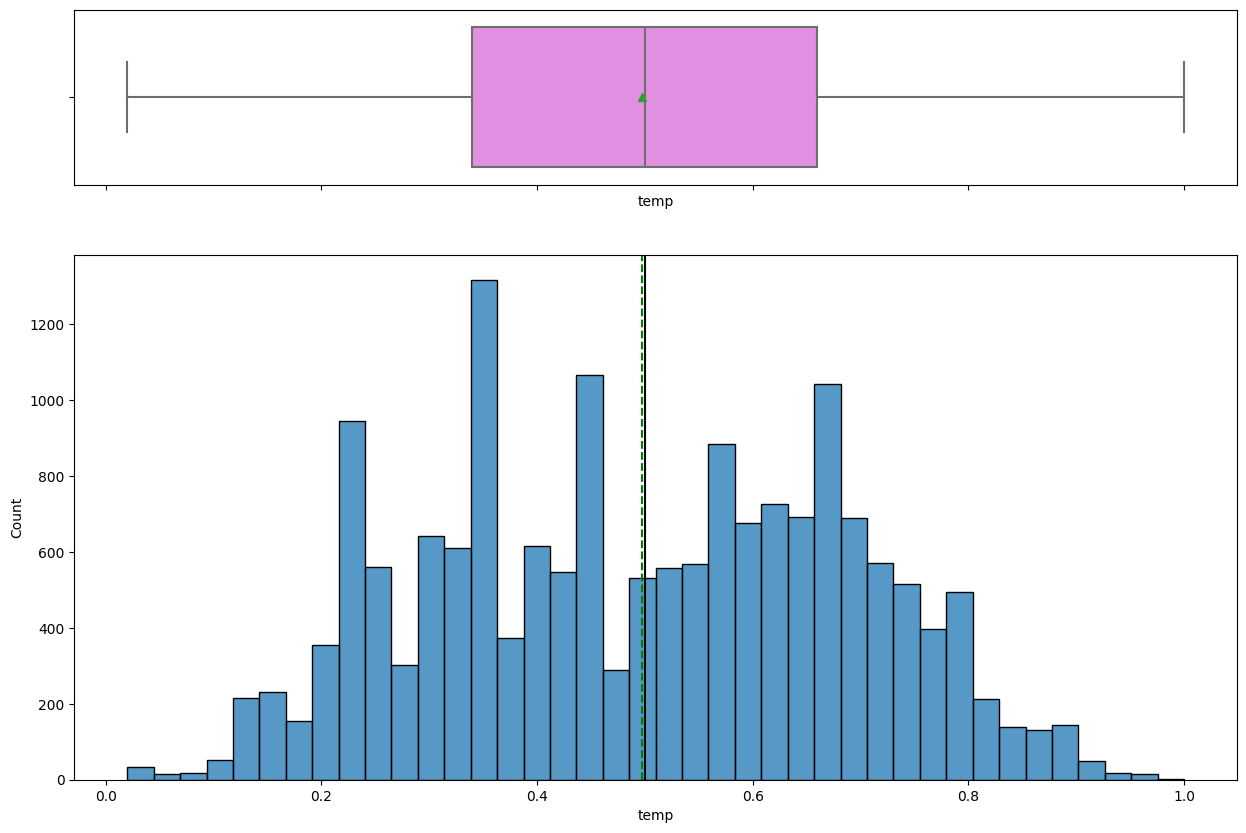

In [ ]:
histogram_boxplot(df, "temp")

#### Observations on 'feel like temperature

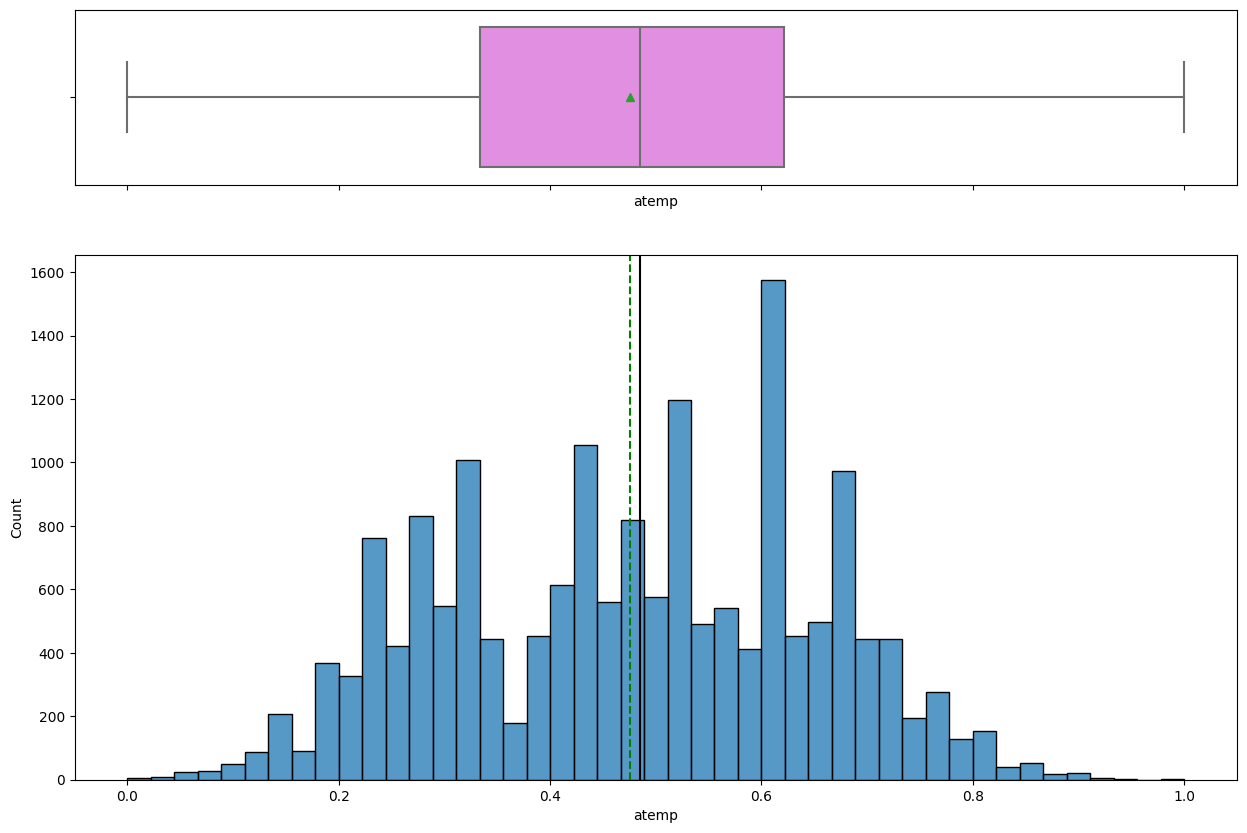

In [ ]:
histogram_boxplot(df, "atemp")

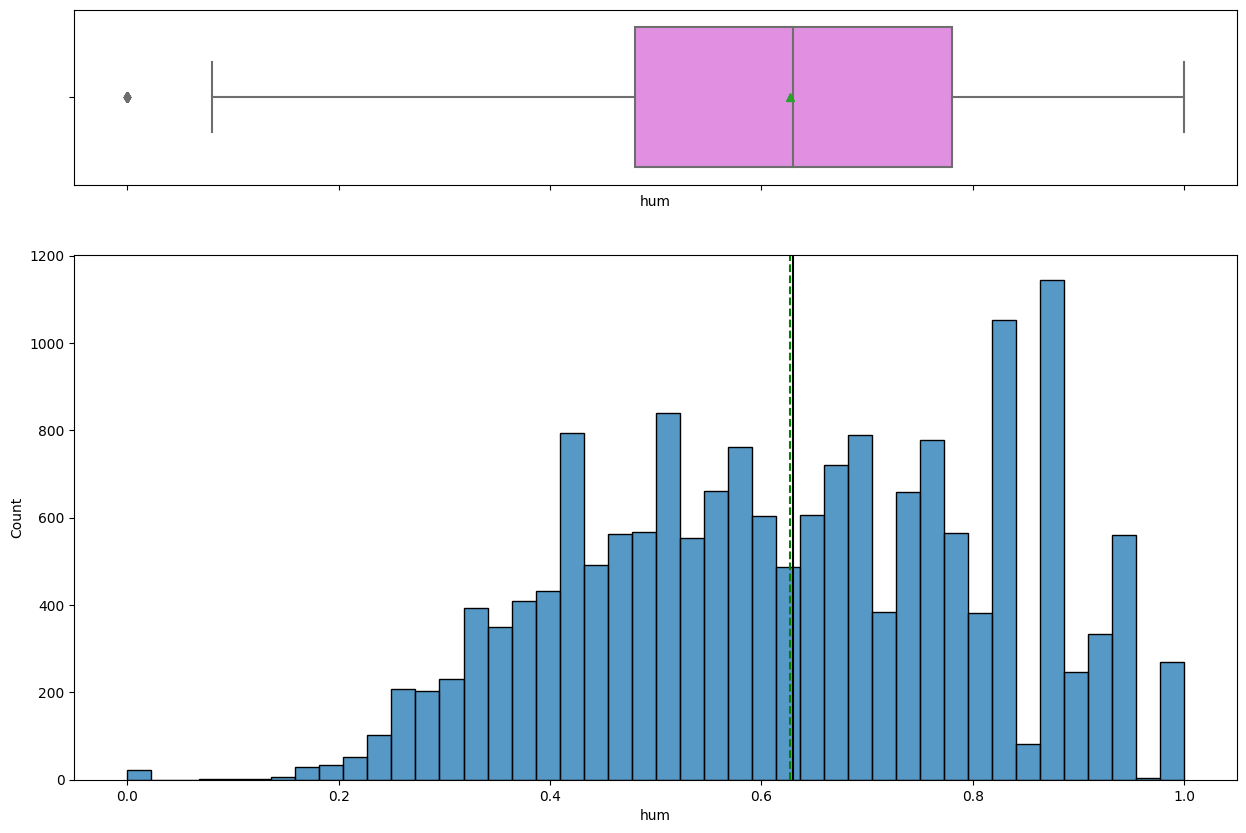

In [ ]:
histogram_boxplot(df,"hum")

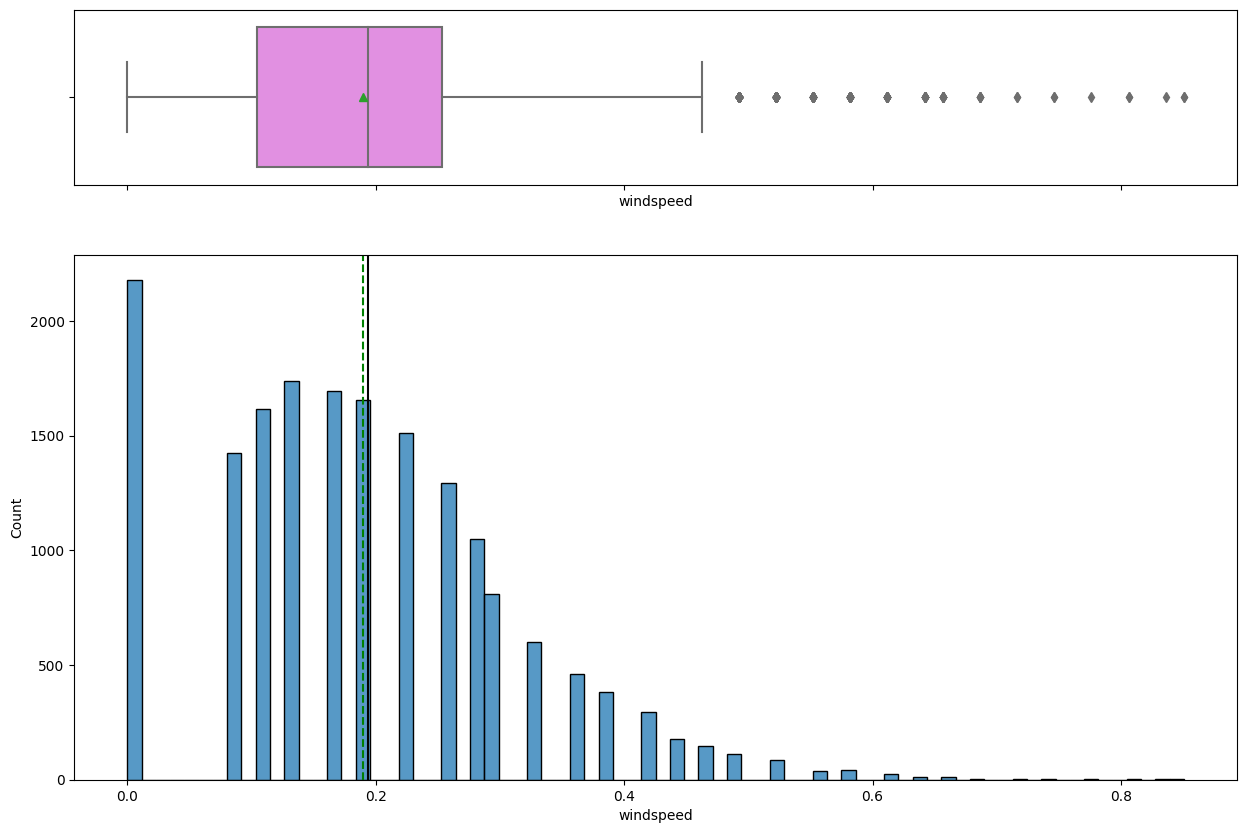

In [ ]:
histogram_boxplot(df,'windspeed')

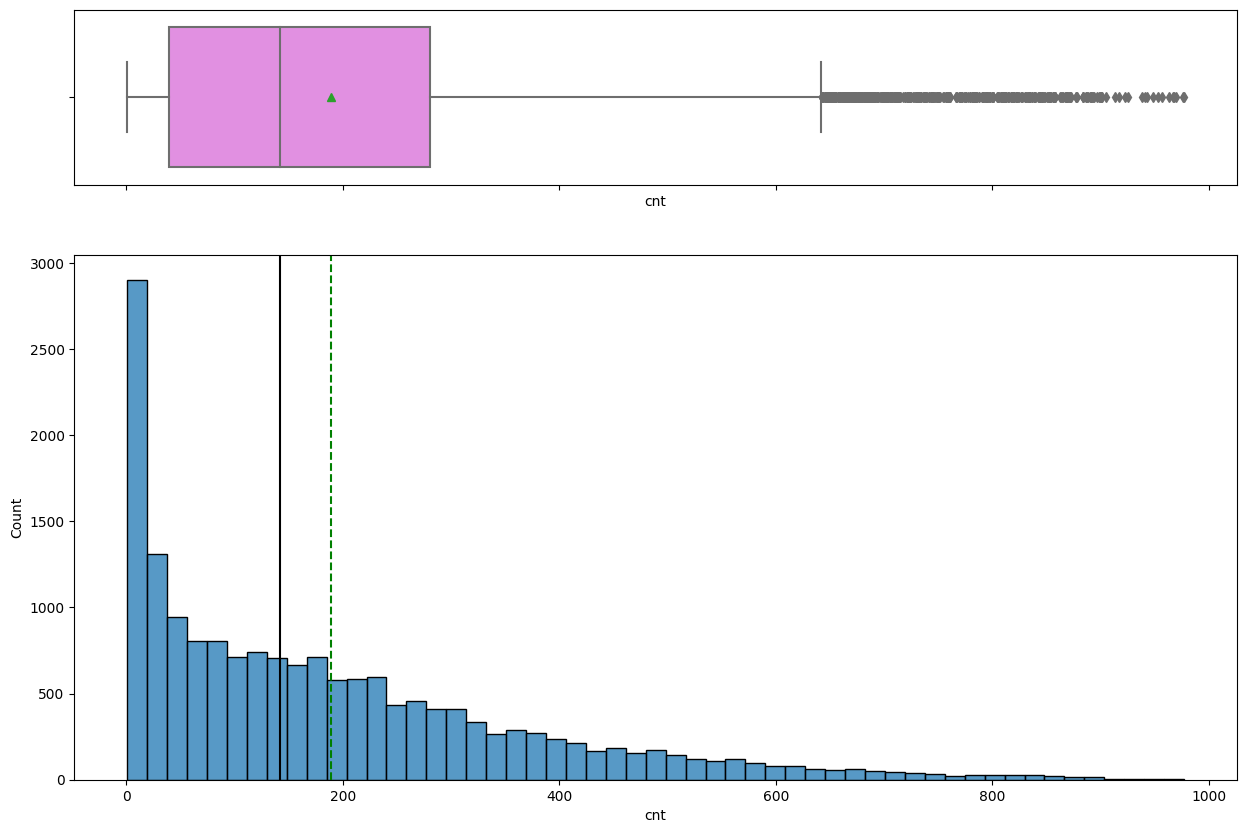

In [ ]:
histogram_boxplot(df,'cnt')

In [ ]:
df['cnt'].nlargest()

14773    977
14964    976
14748    970
14725    968
15084    967
Name: cnt, dtype: int64

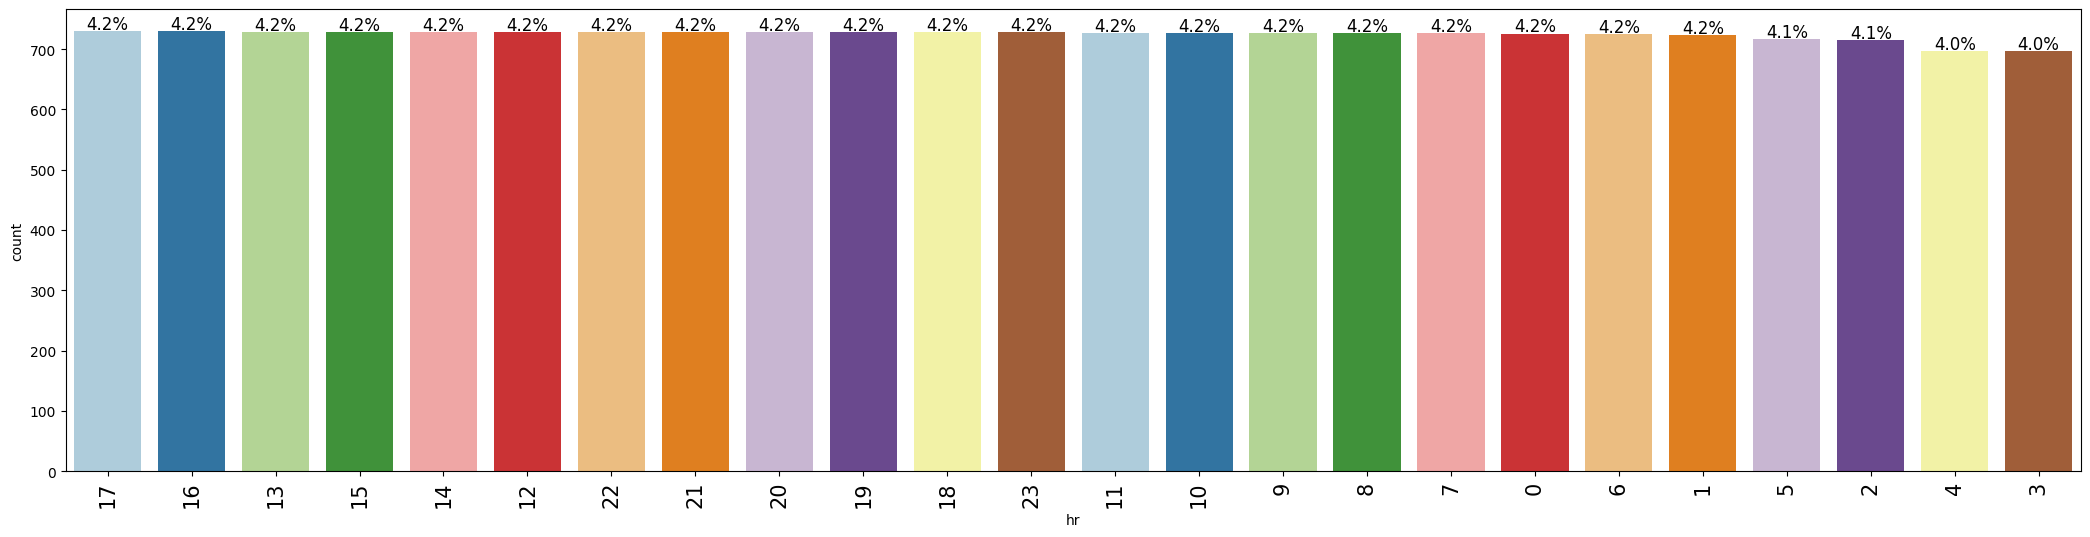

In [ ]:
labeled_barplot(df, "hr",perc=True)

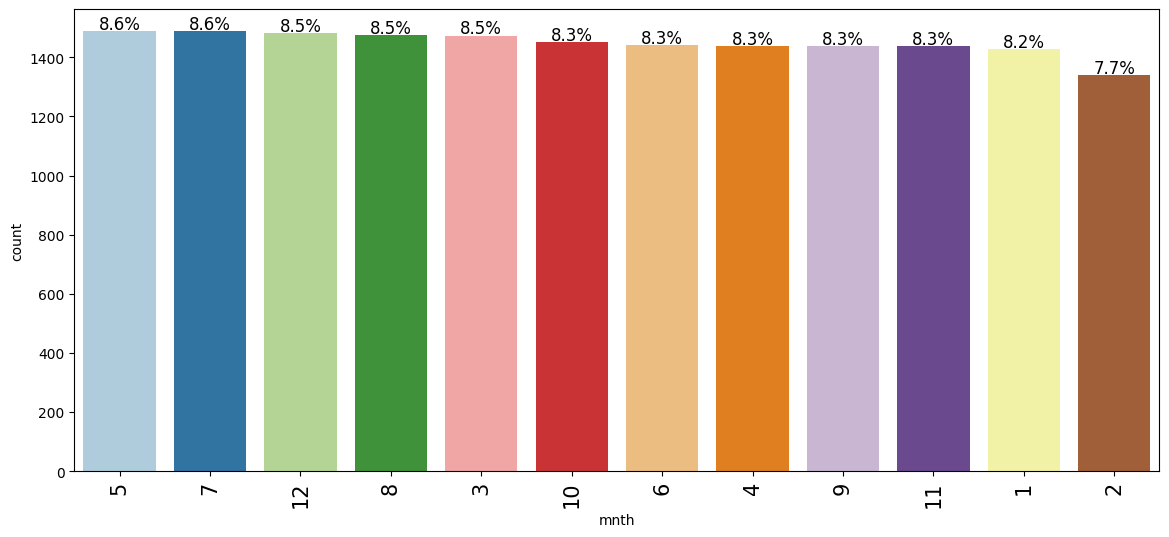

In [ ]:
labeled_barplot(df,'mnth',perc=True)

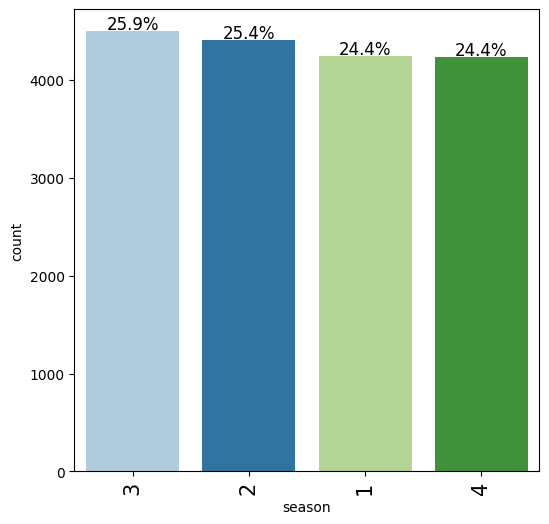

In [ ]:
labeled_barplot(df,'season',perc=True)

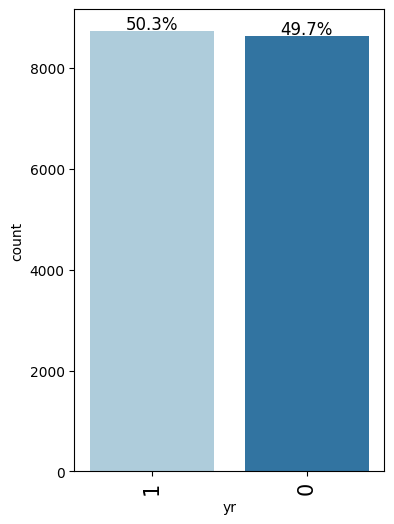

In [ ]:
labeled_barplot(df,'yr',perc=True)

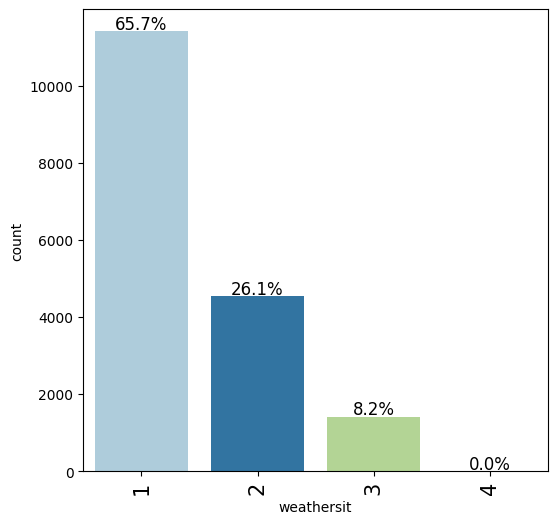

In [ ]:
labeled_barplot(df,'weathersit',perc=True)

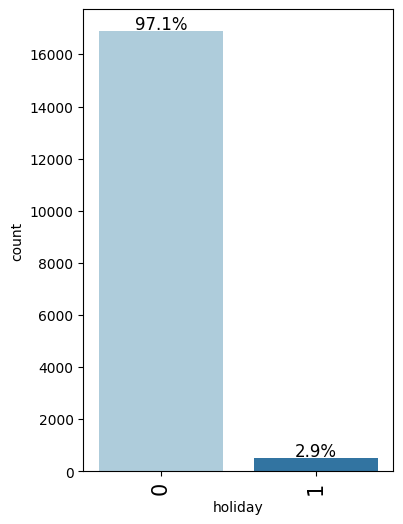

In [ ]:
labeled_barplot(df,'holiday',perc=True)

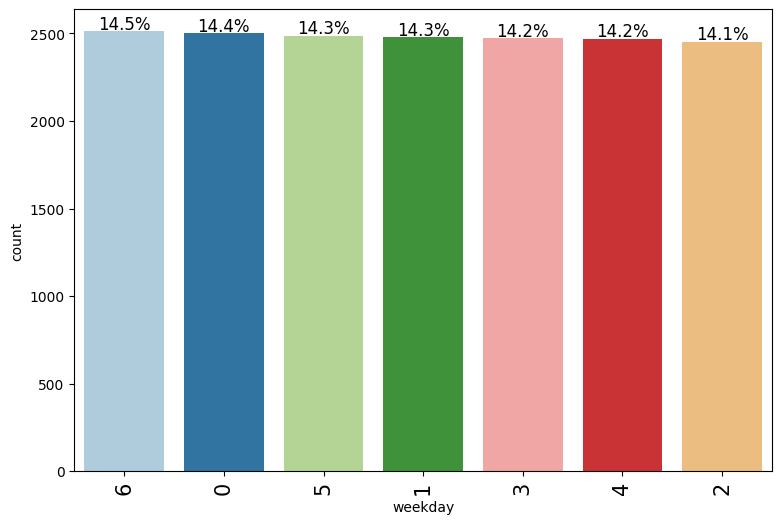

In [ ]:
labeled_barplot(df,'weekday',perc=True)

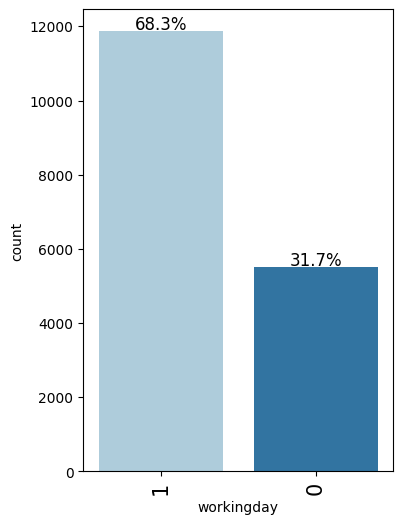

In [ ]:
labeled_barplot(df,'workingday',perc=True)

#### Observations from Univariate analysis


In analyzing the temperature variable, both the histogram and boxplot reveal that the distribution is approximately symmetric, with a mean and median of 0.5. Additionally, the boxplot indicates the absence of any outliers in this variable. Similarly, the feel-like temperature variable exhibits a symmetric distribution without outliers, as observed from the histogram and boxplot.

Moving on to humidity, the histogram suggests that the majority of values are concentrated between 0.4 and 0.8. However, an outlier is present when the humidity value equals 0. The distribution of humidity appears to follow an approximately normal pattern, with a mean and median of 0.63.

Examining windspeed, the histogram shows a right-skewed distribution, with a considerable number of observations at 0 windspeed. The distribution is asymmetric, but the mean and median are approximately equal at a value of 0.19. Notably, there are numerous outliers present for this variable.

Analyzing the target variable, cnt (count of bikes rented), the histogram indicates a right-skewed distribution with a wide range of values. Many observations fall below 10 counts, while some reach over 900 counts. The boxplot also highlights the presence of numerous outliers in this variable.

For the categorical variables, the labeled barplots provide insights into their distributions. The hour variable exhibits an approximately uniform distribution, with each hour (0 to 23) accounting for approximately 4% of the observations. Similarly, each month (1 to 12) represents around 8.5% of the data, with February having slightly fewer observations compared to other months.

Regarding the season variable, each season accounts for approximately 24% of the observations, indicating a relatively even distribution among the seasons. Both years have nearly equal numbers of observations in the dataset, as depicted by the labeled barplot for the year variable.

Analyzing the weathersit variable, it is observed that season 1 has the highest percentage of observations (65.7%), followed by season 2 (26.1%) and season 3 (8.2%). Season 4, which previously had only three observations, now shows 0% observations due to rounding off.

Examining the holiday variable, as expected, the percentage of non-holiday observations is significantly higher (97%) compared to holiday observations (3%).

Analyzing the weekday variable, each weekday (0 to 6) represents approximately 14% of the observations, indicating a relatively uniform distribution.

Lastly, the labeled barplot for the workingday variable reveals that the number of observations for working days is higher (approximately 68%) compared to non-working days (approximately 32%), aligning with expectations.

### Bivariate analysis

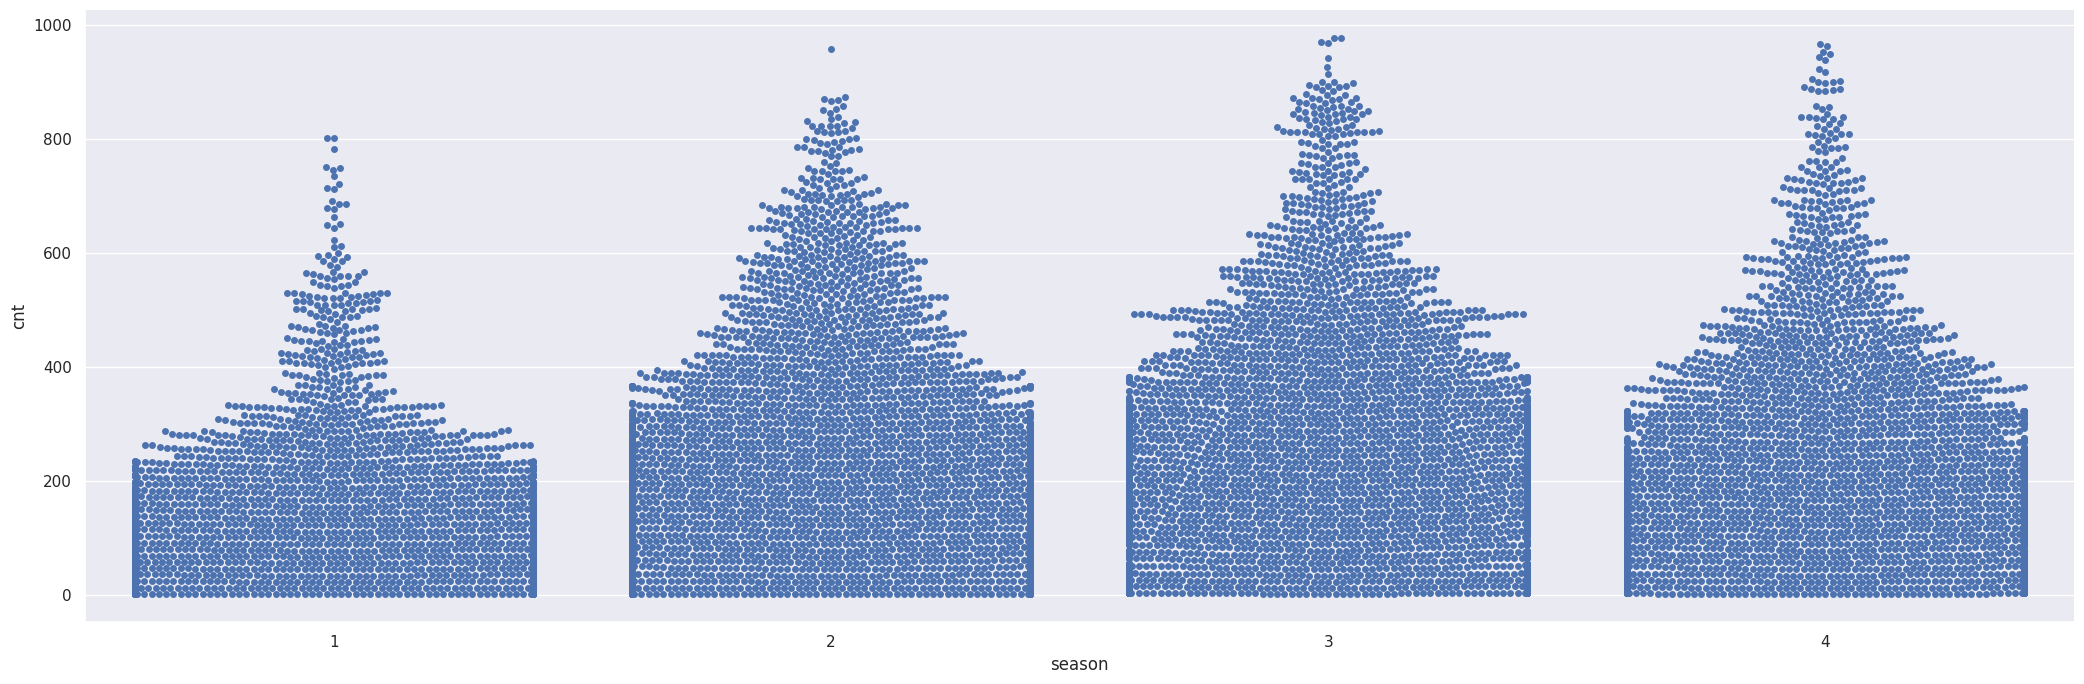

In [ ]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="season", y="cnt", kind="swarm", data=df, height=7, aspect=3);

In analyzing the bike rental data, certain observations can be made. Firstly, it is observed that the lowest number of bikes are rented during the first season. This can be attributed to several factors, one of which may be the relatively higher temperature experienced during that season, specifically in spring. The initial season's lower rental rate may be influenced by a combination of factors, such as less favorable weather conditions for outdoor activities, potential uncertainties or unfamiliarity with the bike rental system, and a general decrease in demand during that time.

On the other hand, the highest number of bikes are shared during the third season. This surge in bike rentals could be attributed to various reasons, one of which is the comparison of the temperature between the first and third seasons. During the fall season (season 3), the temperature tends to be relatively lower, which may lead to more favorable outdoor conditions for biking. The pleasant weather during this time could encourage individuals to engage in outdoor activities, including bike rentals, thereby resulting in a higher demand for bikes.

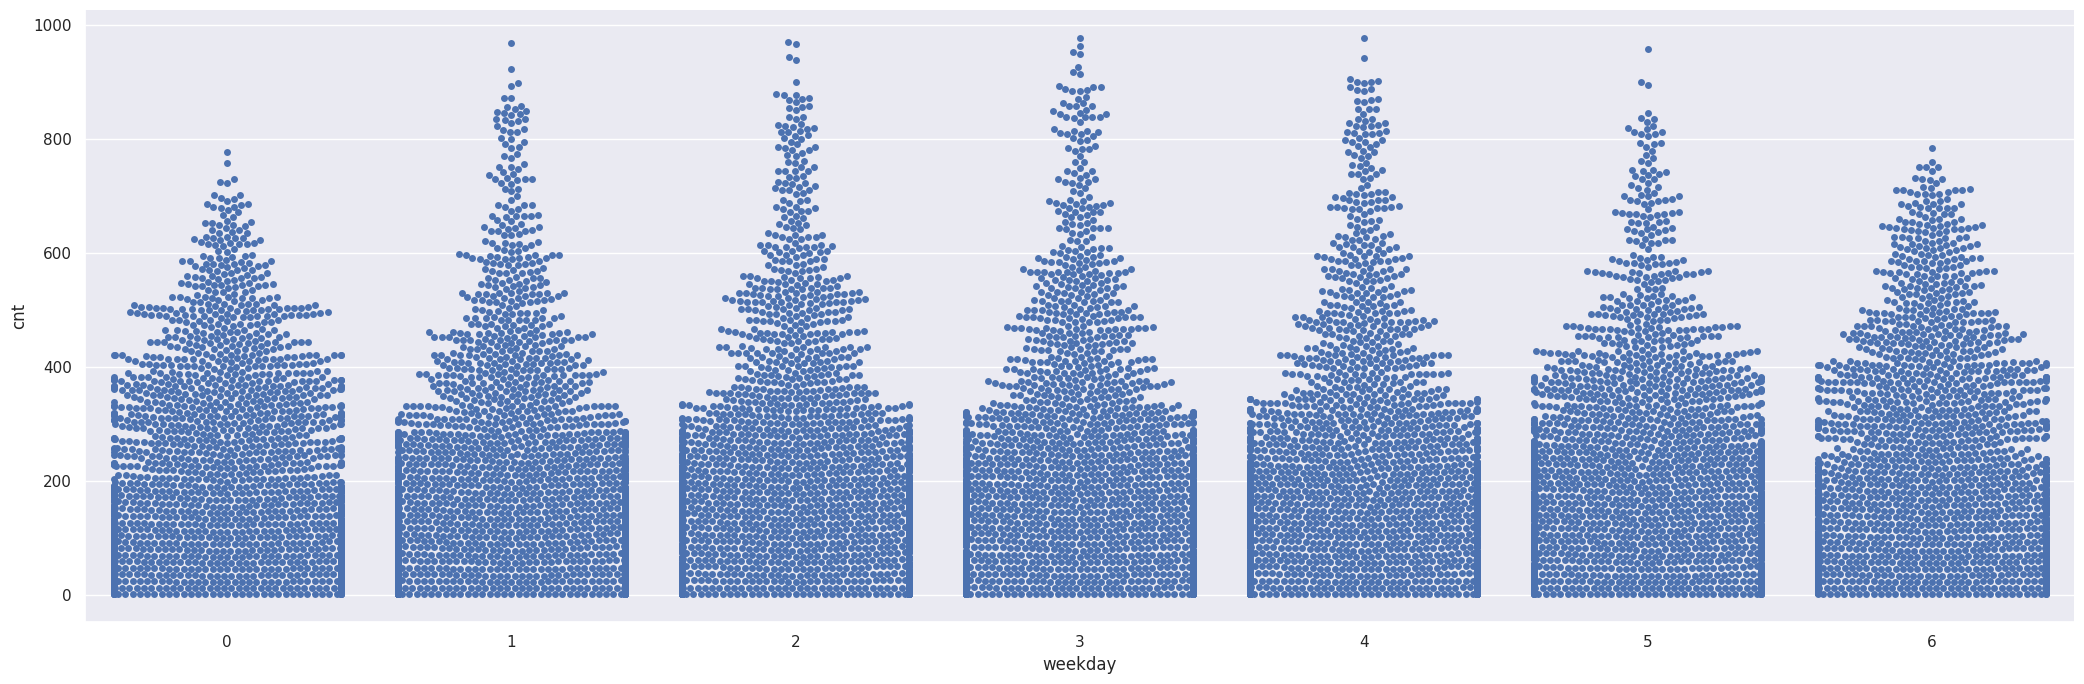

In [ ]:
sns.set(rc={'figure.figsize':(21,7)})
sns.catplot(x="weekday", y="cnt", kind="swarm", data=df, height=7, aspect=3);

Upon analyzing the data, distinct patterns emerge regarding the rental count of bikes based on weekdays. Notably, weekends, represented by weekday values of 0 and 6, exhibit a consistently lower count of rented bikes compared to the rest of the week. Furthermore, the rental count during weekends demonstrates relatively minimal fluctuations. In contrast, working days (weekday values from 1 to 5) show a higher count of rented bikes and a more pronounced variability in the rental count. Notably, there are occasional outliers observed during these working days. A plausible explanation for these patterns could be the closure of schools and offices during weekends, which likely reduces the demand for bike rentals. The presence of closed establishments on weekends potentially contributes to the consistent and lower count of rented bikes during those days.

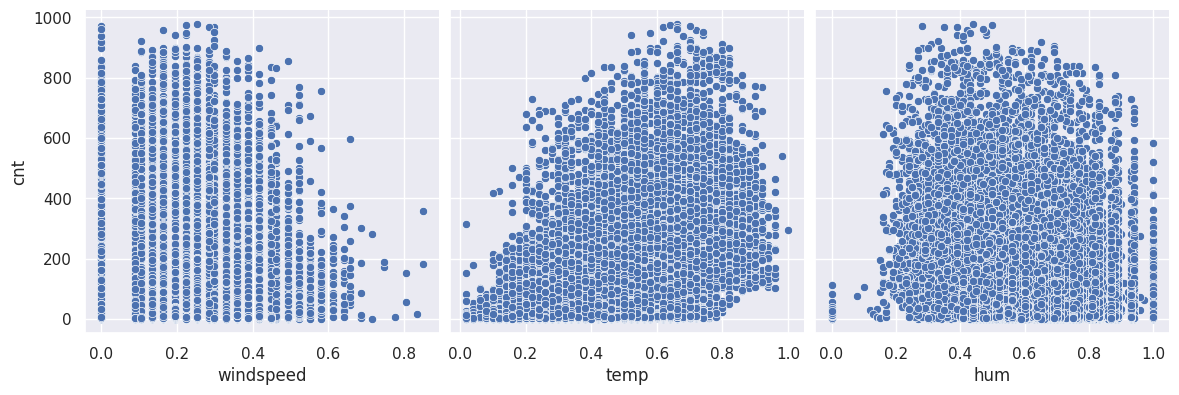

In [ ]:
sns.pairplot(
    df,
    x_vars=["windspeed", "temp", "hum"],
    y_vars=["cnt"],
    height=4,
    aspect=1
    );

The analysis reveals a correlation between the count of rented bikes and various weather conditions. Firstly, it can be observed that the count of rented bikes tends to be low during periods of extremely low or high temperatures. This suggests that individuals may be less inclined to rent bikes when faced with extreme temperature conditions. Similarly, humidity levels also exhibit a similar pattern, with the count of rented bikes being comparatively lower during periods of high humidity. This finding suggests that high humidity might discourage bike rentals, potentially due to discomfort or concerns about the impact of weather conditions on the overall biking experience.

Furthermore, the analysis indicates that the count of rented bikes tends to be higher during periods of low wind speed. This suggests that individuals are more likely to rent bikes when wind conditions are calm. The reasoning behind this observation could be that high wind speeds may make cycling more challenging or less enjoyable, leading to a decrease in bike rentals during such periods.

In summary, the analysis indicates that temperature, humidity, and wind speed have distinct impacts on the count of rented bikes. Extremely low or high temperatures, as well as high humidity levels, are associated with lower bike rental counts, while low wind speeds are correlated with higher bike rental counts. These observations provide valuable insights into the influence of weather conditions on bike rental patterns, which can inform decision-making and planning in the bike-sharing industry.

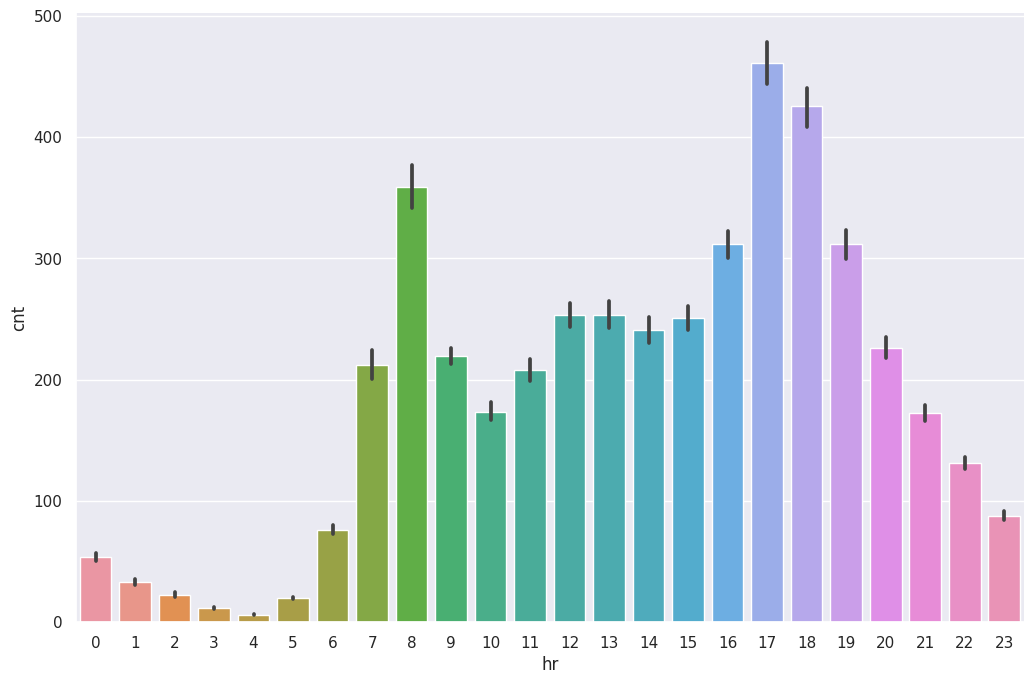

In [ ]:
sns.catplot(x="hr", y="cnt", data=df, kind='bar', height=7, aspect=1.5, estimator=np.mean);


Observing the data, it is evident that there are notable patterns in the average number of bikes rented throughout the day. Specifically, we observe a significant increase in bike rentals during the peak hours of 8 AM and 5-6 PM. This surge in demand can be attributed to the timings of offices, schools, and colleges, where individuals are likely commuting to and from these institutions. The availability of bikes during these periods may be in high demand due to the convenience and efficiency they offer for daily transportation needs.

Conversely, during the night hours from 12 AM to 5 AM, there is a considerable decrease in the average number of bikes rented. This decline suggests that there is relatively low demand for bike rentals during this time frame. Possible reasons for this could include reduced outdoor activity, limited public transportation options, and fewer people requiring bike rentals for their commute during these late-night hours.

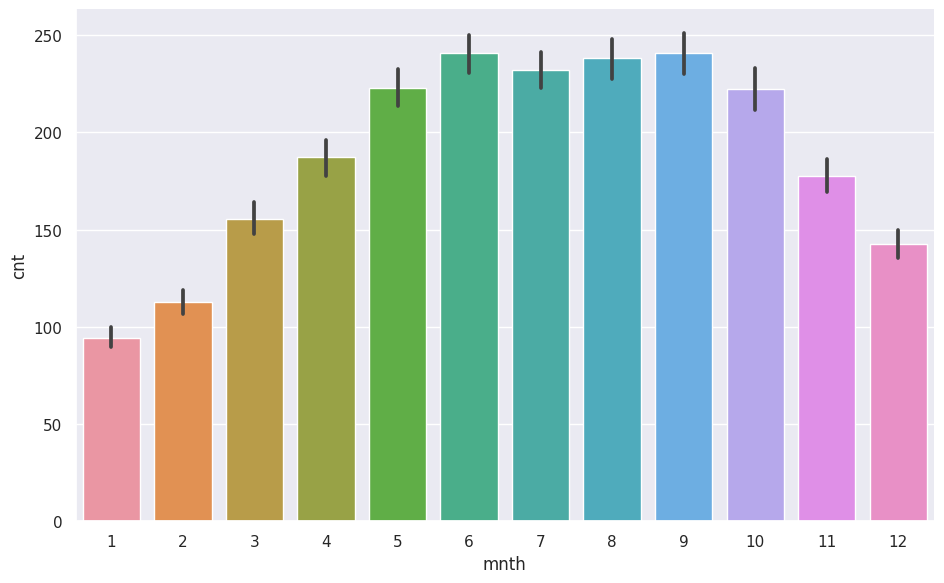

In [ ]:
sns.catplot(x="mnth", y="cnt", data=df, kind='bar', height=6, aspect=1.6, estimator=np.mean);

In examining the data, it is evident that the average number of bikes rented during the months of December, January, and February tends to be relatively low. A plausible explanation for this observation is the influence of cold weather conditions prevalent during these months. It is reasonable to assume that individuals are less inclined to engage in outdoor activities such as biking when faced with colder temperatures. Consequently, the lower average number of bike rentals during these winter months can be attributed to the deterrent effect of cold weather.

Conversely, a consistent pattern emerges when considering the average number of bikes rented during the months from May to October. It becomes apparent that bike rentals experience a substantial increase during this period, indicating consistently high levels of demand. This trend aligns with the warmer weather conditions prevailing during spring, summer, and early autumn, which are typically conducive to outdoor activities. The elevated average number of bike rentals during these months can be attributed to the favorable weather conditions, as individuals are more inclined to participate in outdoor recreational activities, including biking.



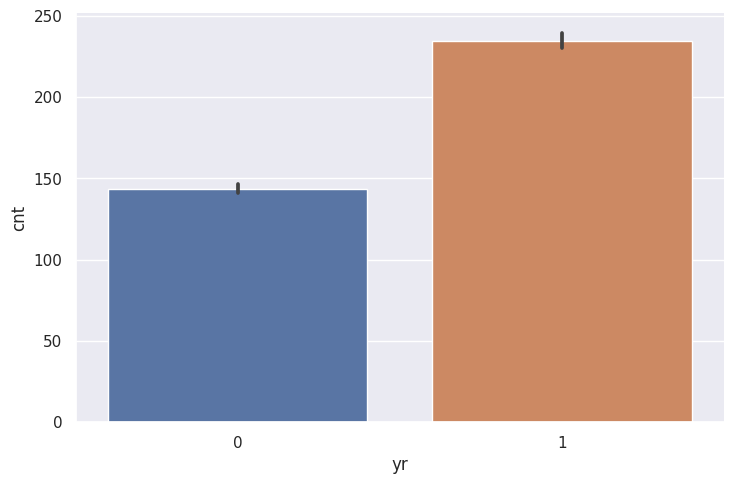

In [ ]:
sns.catplot(x="yr", y="cnt", data=df, kind='bar', aspect=1.5, estimator=np.mean);

In analyzing the data, a notable observation emerges, indicating a higher average count of rented bikes in 2012 compared to 2011. To gain deeper insights, a further examination is conducted by considering the distribution across seasons for both years. This analysis aims to determine whether the increase in bike rentals occurred uniformly throughout the year or if it was concentrated in specific seasons. By scrutinizing the count within each season for both years, we can ascertain whether the surge in rentals was observed consistently across all seasons or limited to only one or two particular seasons. This detailed investigation will shed light on the temporal patterns and provide a comprehensive understanding of the rental trends between the two years, enabling a more precise analysis of the factors influencing the observed changes.

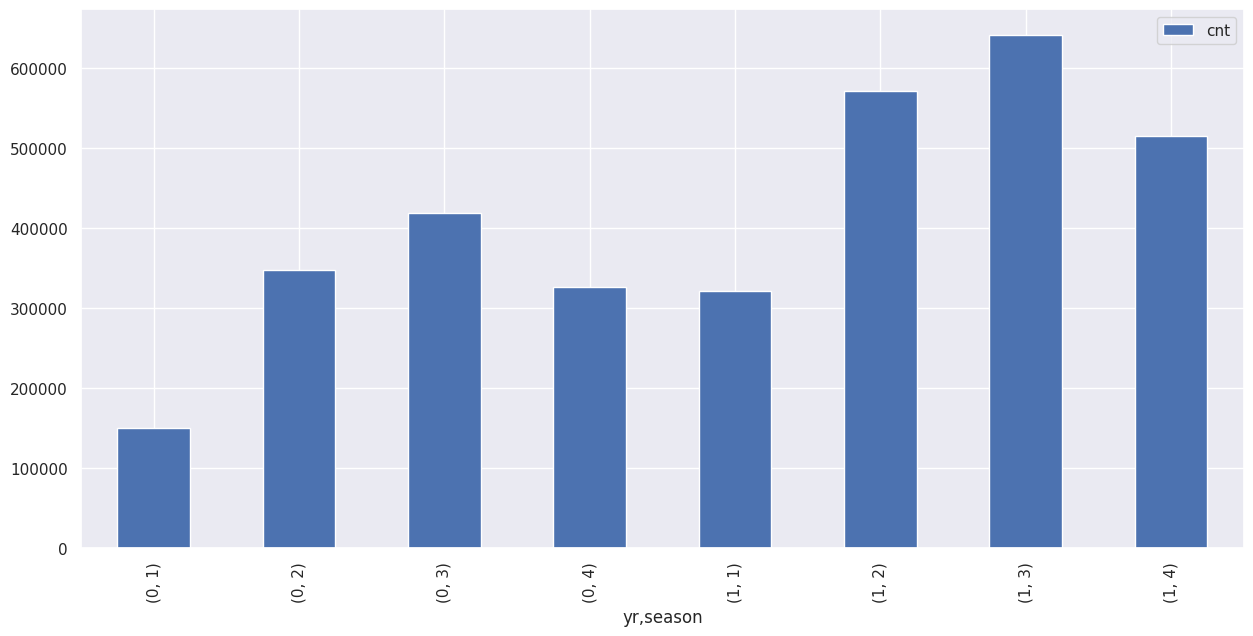

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
pd.pivot_table(data=df, index=['yr', 'season'], values='cnt', aggfunc=np.sum).plot(kind='bar');

Based on the data analysis, it is evident that the number of bikes rented during each season in the year 2012 surpassed the corresponding seasons in 2011. This observation indicates a clear trend of increasing popularity and adoption of bike-sharing over time. The higher rental rates in 2012 suggest a growing interest and utilization of bike-sharing services by individuals during different seasons. The data reflects a positive shift in consumer behavior and a rising preference for bike-sharing as a viable transportation option.


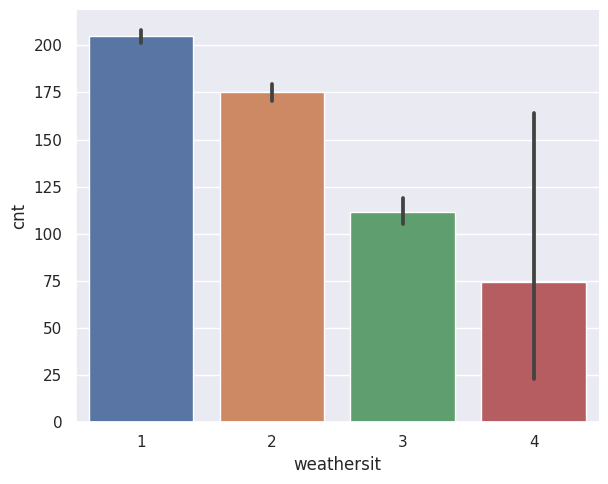

In [ ]:
sns.catplot(x="weathersit", y='cnt', kind='bar', data=df,  aspect=1.25, estimator=np.mean);

Based on the analysis conducted, it is evident that the average number of rented bikes demonstrates a significant disparity based on weather conditions. Specifically, on days characterized by clear or partly cloudy weather, the average count of rented bikes is notably higher compared to days marked by snowfall or rainfall. This observation substantiates the hypothesis that weather conditions exert a substantial influence on the average count of bikes rented. It can be inferred that individuals are more inclined to rent bikes during favorable weather conditions, potentially due to increased comfort, convenience, and overall feasibility. These findings underscore the importance of considering weather patterns as a crucial factor in predicting and understanding the demand for bike rentals.

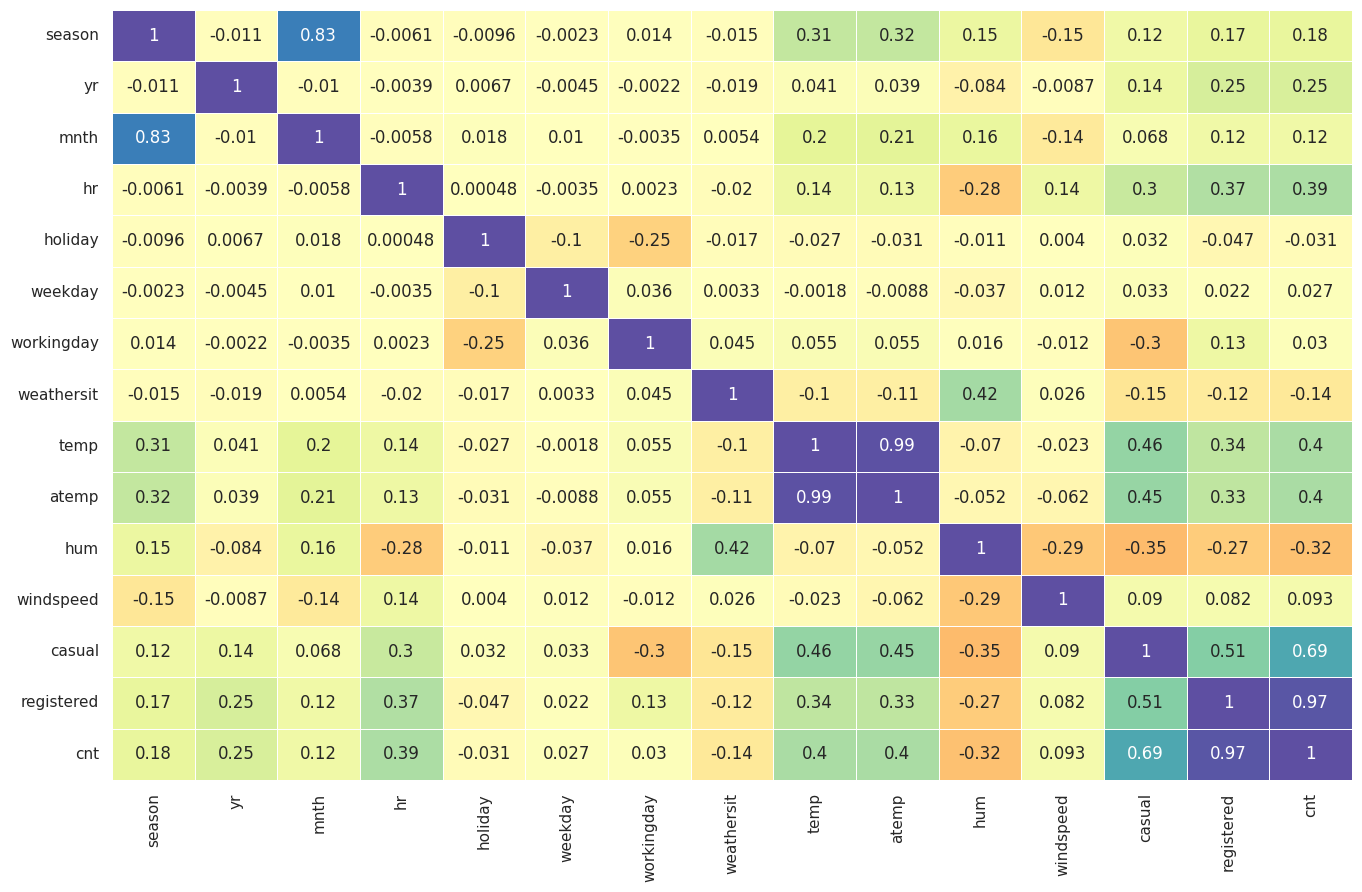

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="Spectral")
plt.show()


Based on the analysis conducted, it can be observed that the variables "temperature" and "feel like temperature" exhibit a strong positive correlation. This implies that as the temperature increases, the perceived temperature or "feel like temperature" also tends to increase. The correlation coefficient between these two variables indicates a close relationship, suggesting that changes in one variable are closely associated with changes in the other.

Furthermore, it can be noted that there is a significant positive correlation between the variables "month" and "season." This implies that the month of the year and the season are strongly related. The correlation coefficient between these variables indicates a high degree of association, suggesting that the month of the year can be used as a reliable indicator of the corresponding season.

In terms of the "count" variable, it is important to consider its composition, which is the sum of two columns: "casual" and "registered." Since the "count" variable is essentially a combination of these two columns, it is redundant to include them in a predictive model. Instead, it would be more appropriate to exclude these two columns when predicting new observations. By doing so, the model can avoid the redundancy of incorporating information that can be easily obtained by summing the "casual" and "registered" counts separately.

In summary, the analysis reveals a strong correlation between "temperature" and "feel like temperature" variables, as well as a notable positive correlation between "month" and "season." Additionally, it is recommended to exclude the "casual" and "registered" columns when building a model for predicting the "count" variable, as their inclusion would introduce redundancy.

## Data Preprocessing

### Outlier Detection and Treatment

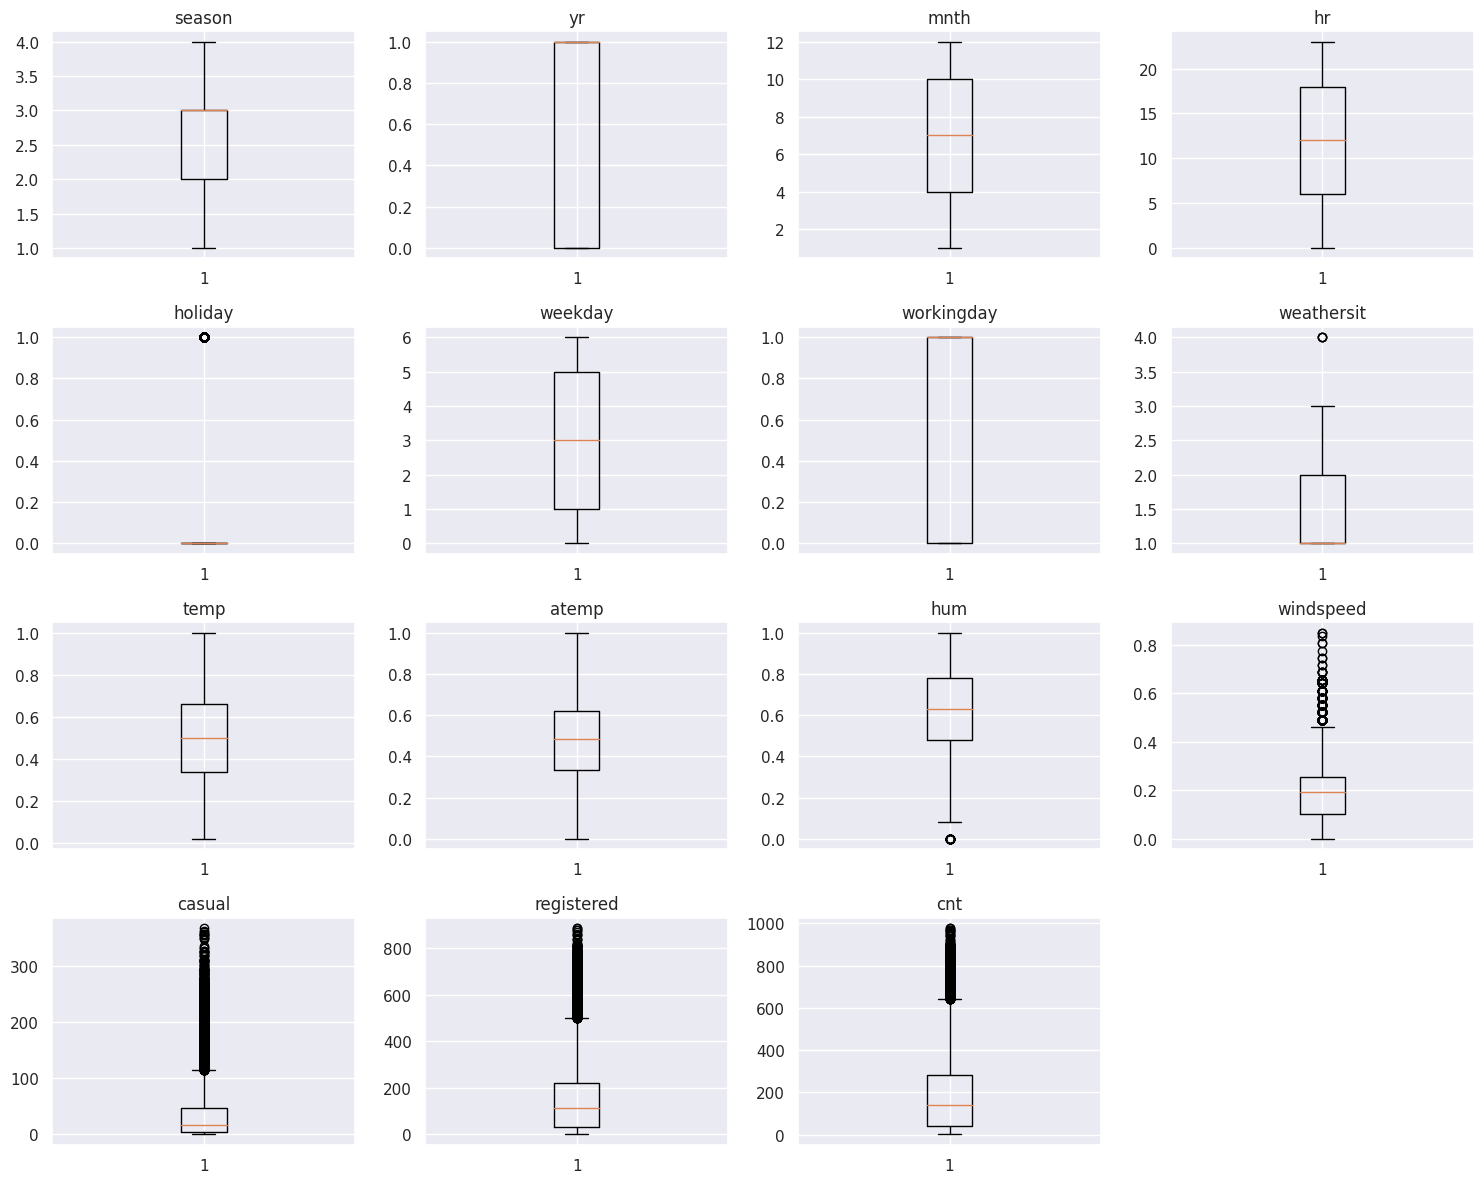

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


After analyzing the dataset, it can be observed that a considerable number of data points exhibit characteristics that deviate significantly from the norm, commonly known as outliers. These outliers possess values that lie far outside the typical range observed in the dataset. It is important to note that although these outliers exist, it is inappropriate to consider them as valid or representative values for the given context or analysis being performed. Therefore, it is imperative to exercise caution and refrain from incorporating these outliers into the analysis or treating them as genuine data points. By disregarding these aberrant values, the integrity and accuracy of the analysis can be preserved, ensuring that the conclusions drawn are based on reliable and representative information.

**Actions for data pre-processing:**

- Since the "count" column is derived from the sum of the "casual" and "registered" columns, it is redundant to include these two columns in the dataset. Including them would not add any meaningful information for modeling purposes since the "count" can be obtained simply by adding the values of "casual" and "registered".

- It is important to note that when predicting new observations, the "casual" and "registered" columns would not be available. Therefore, any modeling or analysis performed should not rely on these two columns as they will not be present in the data for future predictions.

In [ ]:
#Dropping columns - casual and registered
data.drop(columns=['casual','registered'], inplace=True)

### Data Preparataion for model building

In [ ]:
# Separating features and the target column
X = data.drop('cnt', axis=1)
y = data['cnt']

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, shuffle=True)

In [ ]:
X_train.shape, X_test.shape

((12165, 12), (5214, 12))

## Bagging - Model Building and Hyperparameter Tuning

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):

    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2=metrics.r2_score(y_train,pred_train)
    test_r2=metrics.r2_score(y_test,pred_test)
    train_rmse=np.sqrt(metrics.mean_squared_error(y_train,pred_train))
    test_rmse=np.sqrt(metrics.mean_squared_error(y_test,pred_test))

    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True:
        print("R-sqaure on training set : ",metrics.r2_score(y_train,pred_train))
        print("R-square on test set : ",metrics.r2_score(y_test,pred_test))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train,pred_train)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test,pred_test)))

    # returning the list with train and test scores
    return score_list

### Decision Tree Model

In [ ]:
dtree=DecisionTreeRegressor(random_state=1)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
dtree_model_train_perf=model_performance_regression(dtree, X_train,y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
        RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.442409  0.005754   0.999994        0.999994  0.004256


In [ ]:
dtree_model_test_perf=model_performance_regression(dtree, X_test,y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
         RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  60.827833  35.107787   0.892227        0.891979  38.03325


Based on our empirical findings, it has been observed that the Decision tree model, when trained with default parameters, exhibits a notable case of overfitting on the training data. Overfitting refers to a phenomenon where the model becomes excessively tailored to the training data, thereby compromising its ability to generalize well on unseen test data. In order to address this issue and enhance the model's performance on the test data, we propose the exploration of hyperparameter tuning techniques.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': list(np.arange(2,20)) + [None],
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, min_impurity_decrease=0.1,
                      min_samples_leaf=5, random_state=1)

In [ ]:
dtree_tuned_model_train_perf = model_performance_regression(dtree_tuned, X_train,y_train)
print("Training performance \n",dtree_tuned_model_train_perf)

Training performance 
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  36.442792  22.525337   0.958856        0.958816  28.657314


In [ ]:
dtree_tuned_model_test_perf = model_performance_regression(dtree_tuned, X_test,y_test)
print("Testing performance \n",dtree_tuned_model_test_perf)

Testing performance 
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  54.969957  31.841364   0.911985        0.911782  38.356397


After conducting hyperparameter tuning, it was observed that the occurrence of overfitting in the model was significantly reduced. This improvement was accompanied by an approximate increase of 2% in the test score, indicating enhanced performance and a better fit to the data. Additionally, the root mean square error (RMSE) on the test data showed a reduction, further reinforcing the effectiveness of the tuned model. Consequently, it can be inferred that the optimized model demonstrates superior generalization capabilities compared to the decision tree model with default parameters. These findings highlight the positive impact of hyperparameter tuning in enhancing model performance and its ability to effectively generalize beyond the training data, thus providing valuable insights for future research in this domain.

**Plotting the feature importance of each variable**

In [ ]:
print(pd.DataFrame(dtree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.634942
temp        0.117441
yr          0.079271
workingday  0.063920
season      0.022164
atemp       0.019463
weathersit  0.019460
hum         0.017227
mnth        0.010498
weekday     0.010009
windspeed   0.003882
holiday     0.001724


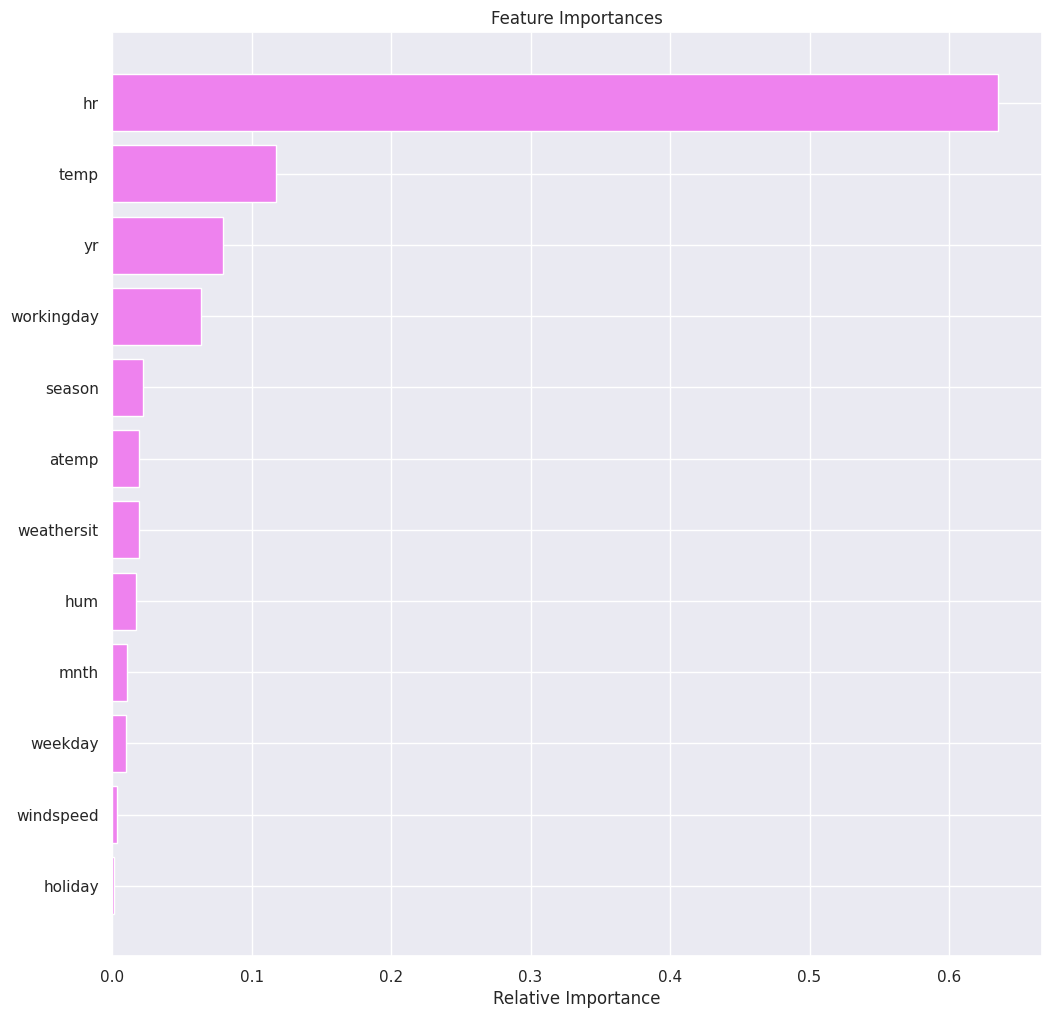

In [ ]:
feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Among the features considered in the tuned decision tree model, namely temperature (temp), year (yr), and hour (hr), the hour variable stands out as the most influential. This observation suggests that the hour of the day significantly impacts the decision-making process of the model. The importance of hr in predicting the outcome implies that the specific time of day holds valuable information for accurately determining the desired outcome.

### Random Forest Model

In [ ]:
rf_estimator=RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [ ]:
rf_estimator_model_train_perf = model_performance_regression(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
         RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  16.167421  9.641324   0.991902        0.991894  11.757327


In [ ]:
rf_estimator_model_test_perf = model_performance_regression(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
        RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  44.56215  26.192368   0.942159        0.942026  32.748634


Based on the experimental results, it can be observed that the Random Forest model demonstrates a commendable R2 score of 94% when evaluated on the test dataset. However, a careful examination reveals a slight issue of overfitting, specifically when training the model. In an attempt to address this overfitting concern, a hyperparameter tuning approach is proposed.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {
                'max_depth':[4, 6, 8, 10, None],
                'max_features': ['sqrt','log2',None],
                'n_estimators': [80, 90, 100, 110, 120]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=None, n_estimators=120, random_state=1)

In [ ]:
rf_tuned_model_train_perf = model_performance_regression(rf_tuned, X_train, y_train)
print("Training performance \n",rf_tuned_model_train_perf)

Training performance 
         RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  16.160093  9.622604    0.99191        0.991902  11.73432


In [ ]:
rf_tuned_model_test_perf = model_performance_regression(rf_tuned, X_test, y_test)
print("Testing performance \n",rf_tuned_model_test_perf)

Testing performance 
       RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  44.5806  26.202363   0.942111        0.941977  32.734172


- No significant change in the result. The result is almost the same before or after the hyperparameter tuning.

In [ ]:
print(pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.610116
temp        0.121773
yr          0.076295
workingday  0.059489
hum         0.026844
weathersit  0.020962
season      0.020876
atemp       0.020670
mnth        0.016153
weekday     0.013539
windspeed   0.010510
holiday     0.002774


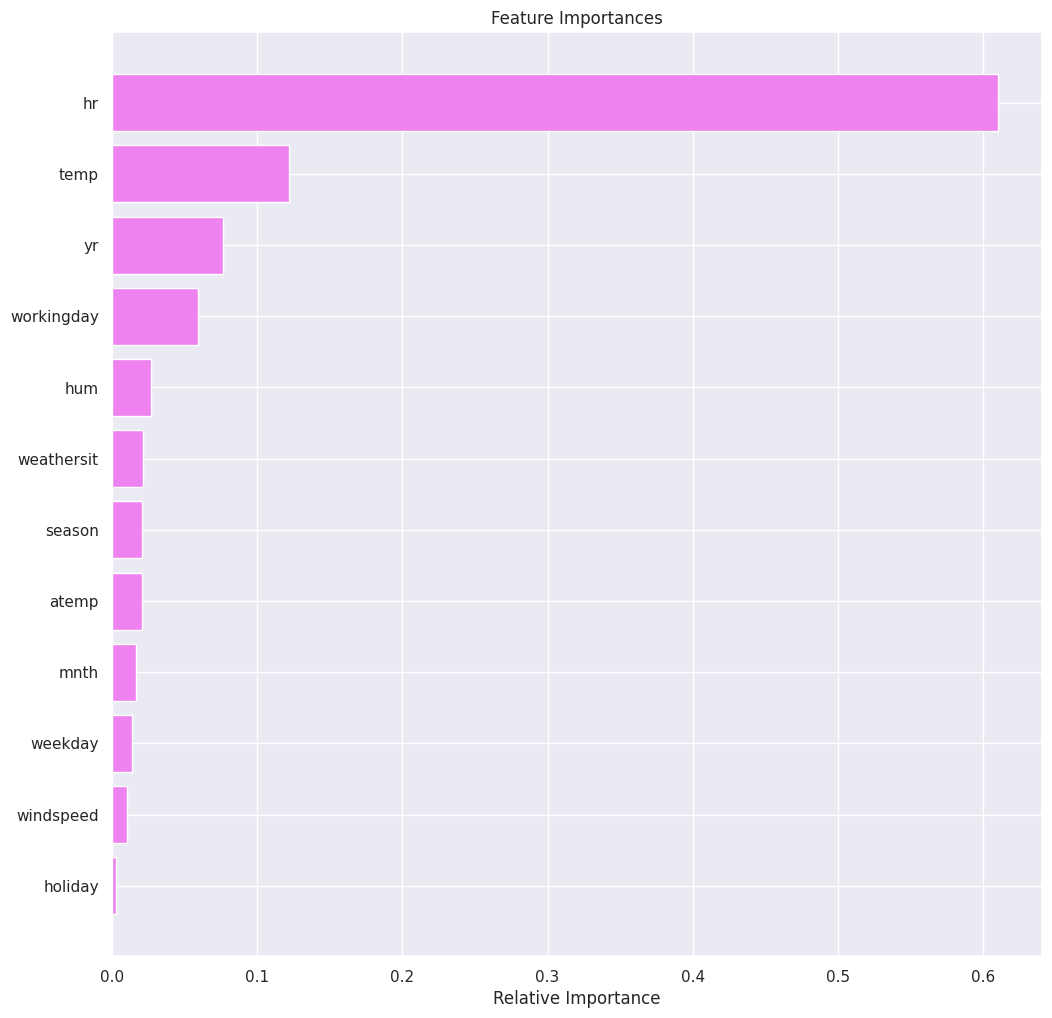

In [ ]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

hr is the most important feature, in addition to temp and yr, for the tuned random forest model.

## Boosting - Model Building and Hyperparameter Tuning

### AdaBoost Regressor

In [ ]:
ab_regressor=AdaBoostRegressor(random_state=1)
ab_regressor.fit(X_train,y_train)

AdaBoostRegressor(random_state=1)

In [ ]:
ab_regressor_model_train_perf = model_performance_regression(ab_regressor, X_train,y_train)
print("Training performance \n",ab_regressor_model_train_perf)

Training performance 
          RMSE        MAE  R-squared  Adj. R-squared        MAPE
0  104.441843  80.996029   0.662067        0.661733  185.877344


In [ ]:
ab_regressor_model_test_perf = model_performance_regression(ab_regressor, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Testing performance 
          RMSE        MAE  R-squared  Adj. R-squared        MAPE
0  105.415729  81.468364   0.676321        0.675574  196.403082


The AdaBoost algorithm exhibits good generalization capability; however, it demonstrates inferior performance compared to both the decision tree and random forest models in terms of R2 score and root mean square error (RMSE). The decision tree and random forest models outperform AdaBoost in terms of predictive accuracy. The R2 score, which measures the proportion of the variance in the target variable explained by the model, is lower for AdaBoost compared to the other models. Additionally, AdaBoost exhibits higher RMSE values, indicating larger prediction errors. These findings suggest that while AdaBoost may generalize well to unseen data, it struggles to achieve the same level of accuracy as the decision tree and random forest models in this particular context.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
ab_tuned = AdaBoostRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(10,100,10),
              'learning_rate': [1, 0.1, 0.5, 0.01],
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(ab_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
ab_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
ab_tuned.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, n_estimators=30, random_state=1)

In [ ]:
ab_tuned_model_train_perf = model_performance_regression(ab_tuned, X_train,y_train)
print("Training performance \n",ab_tuned_model_train_perf)

Training performance 
          RMSE        MAE  R-squared  Adj. R-squared        MAPE
0  103.326379  80.468809   0.669247         0.66892  195.189129


In [ ]:
ab_tuned_model_test_perf = model_performance_regression(ab_tuned, X_test,y_test)
print("Testing performance \n",ab_tuned_model_test_perf)

Testing performance 
          RMSE        MAE  R-squared  Adj. R-squared        MAPE
0  104.430458  81.015165   0.682343         0.68161  207.467888


- We can see that there is no significant improvement in the model after hyperparameter tuning.

In [ ]:
print(pd.DataFrame(ab_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.523674
yr          0.135837
atemp       0.076841
workingday  0.058274
season      0.049087
weathersit  0.047040
hum         0.046359
mnth        0.036370
temp        0.026518
holiday     0.000000
weekday     0.000000
windspeed   0.000000


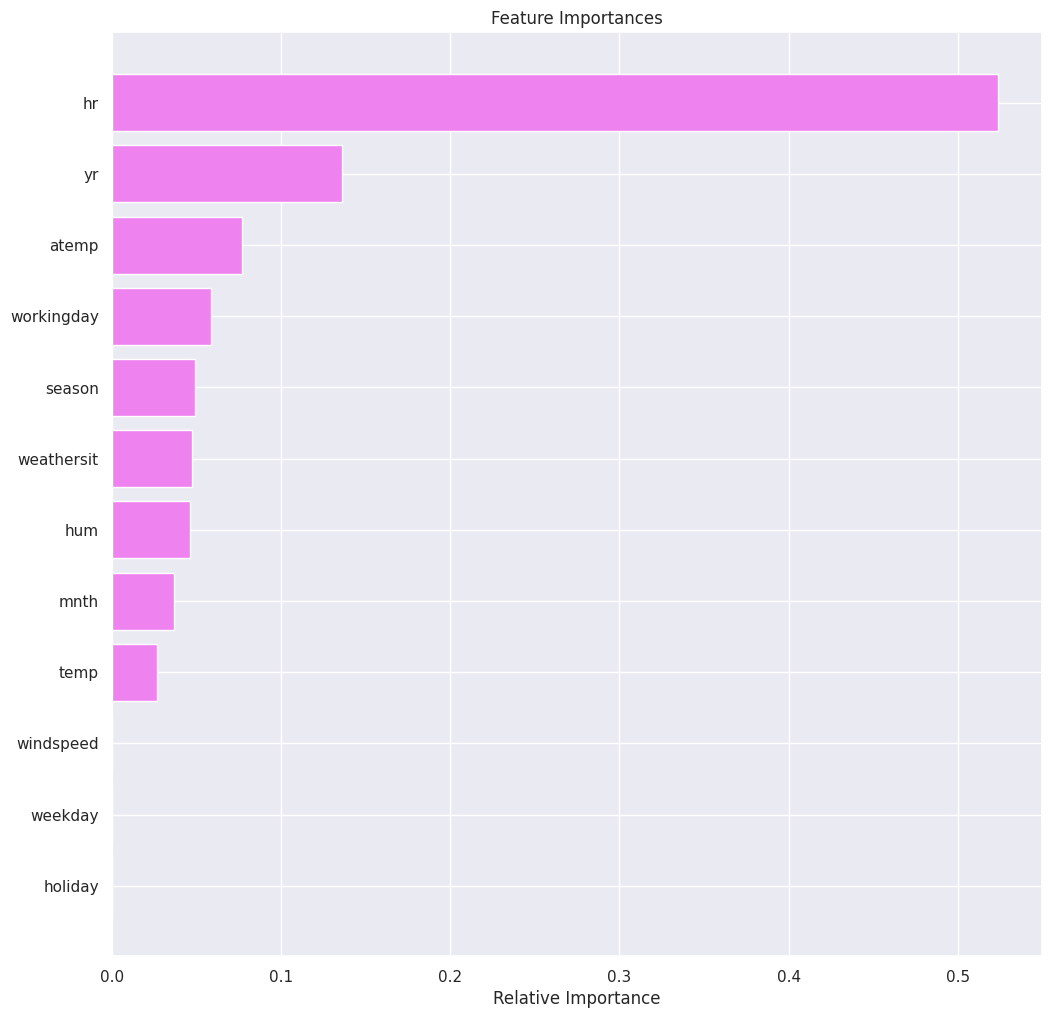

In [ ]:
feature_names = X_train.columns
importances = ab_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

hr is the most important feature here, followed by yr and atemp.

### Gradient Boosting Regressor

In [ ]:
gb_estimator=GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train,y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
gb_estimator_model_train_perf = model_performance_regression(gb_estimator, X_train,y_train)
print("Training performance \n",gb_estimator_model_train_perf)

Training performance 
        RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  71.87459  48.518039   0.839959        0.839801  92.152544


In [ ]:
gb_estimator_model_test_perf = model_performance_regression(gb_estimator, X_test, y_test)
print("Testing performance \n",gb_estimator_model_test_perf)

Testing performance 
         RMSE        MAE  R-squared  Adj. R-squared        MAPE
0  74.173279  49.691124    0.83975         0.83938  100.149788


Gradient boosting demonstrates satisfactory generalization performance; nevertheless, its predictive accuracy falls short of that exhibited by random forest.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
gb_tuned = GradientBoostingRegressor(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50,200,25),
              'subsample':[0.7,0.8,0.9,1],
              'max_features':[0.7,0.8,0.9,1],
              'max_depth':[3,5,7,10]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=7, max_features=0.9, n_estimators=175,
                          random_state=1, subsample=0.7)

In [ ]:
gb_tuned_model_train_perf = model_performance_regression(gb_tuned, X_train,y_train)
print("Training performance \n",gb_tuned_model_train_perf)

Training performance 
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  22.272348  14.726501   0.984632        0.984617  23.168969


In [ ]:
gb_tuned_model_test_perf = model_performance_regression(gb_tuned, X_test, y_test)
print("Testing performance \n",gb_tuned_model_test_perf)

Testing performance 
         RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  39.076262  24.101884   0.955524        0.955421  36.01227



Significant improvements have been observed in the model's performance, as evidenced by the notable enhancements in the r2 score and RMSE metrics. Specifically, the r2 score has exhibited an approximate increase of 12% on the test data, indicating a substantial boost in the model's ability to explain the variance in the target variable. Furthermore, the RMSE, a measure of the model's prediction accuracy, has demonstrated a reduction of more than 30 units for the test data. This decrease signifies a substantial improvement in the model's ability to accurately estimate the target variable's values. These advancements signify the model's enhanced predictive capabilities and underscore its potential utility in accurately predicting and explaining the desired outcomes.

In [ ]:
print(pd.DataFrame(gb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
hr          0.577712
temp        0.099255
workingday  0.083006
yr          0.081833
atemp       0.046505
hum         0.024214
season      0.024071
weathersit  0.020767
weekday     0.018315
mnth        0.013716
windspeed   0.007647
holiday     0.002959


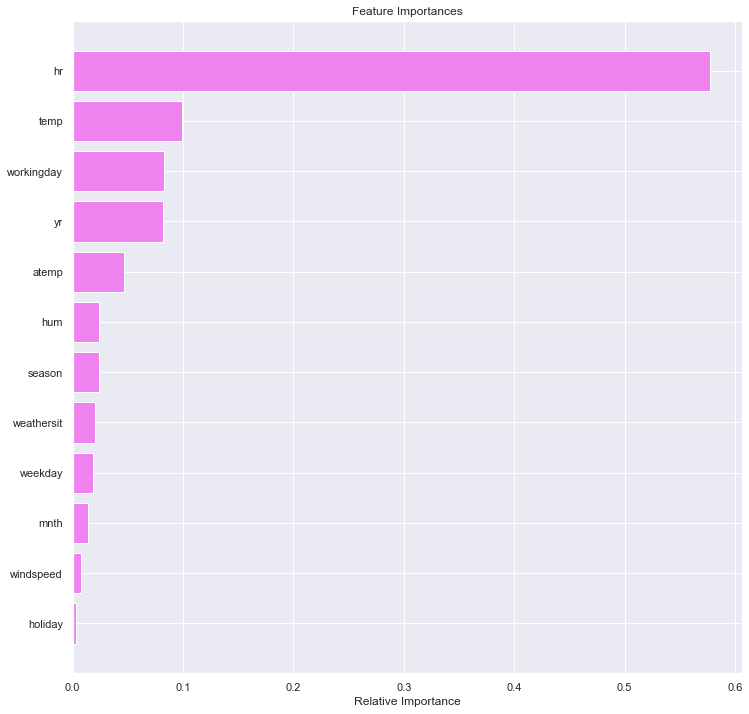

In [ ]:
feature_names = X_train.columns
importances = gb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- hr is the most important feature. temp, yr and workingday have almost equal importance

### XGBoost Regressor

In [ ]:
xgb_estimator=XGBRegressor(random_state=1, verbosity = 0)
xgb_estimator.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [ ]:
xgb_estimator_model_train_perf = model_performance_regression(xgb_estimator, X_train, y_train)
print("Training performance \n",xgb_estimator_model_train_perf)

Training performance 
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  27.214945  17.680308   0.977055        0.977032  29.490298


In [ ]:
xgb_estimator_model_test_perf = model_performance_regression(xgb_estimator, X_test,y_test)
print("Testing performance \n",xgb_estimator_model_test_perf)

Testing performance 
         RMSE        MAE  R-squared  Adj. R-squared      MAPE
0  41.356427  25.804078   0.950182        0.950067  41.83796


XGBoost with default parameters is giving almost as good results as the tuned gradient boosting model.

### Hyperparameter Tuning

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBRegressor(random_state=1, verbosity = 0)

# Grid of parameters to choose from
parameters = {'n_estimators': [75,100,125,150],
              'subsample':[0.7, 0.8, 0.9, 1],
              'gamma':[0, 1, 3, 5],
              'colsample_bytree':[0.7, 0.8, 0.9, 1],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=1, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [ ]:
xgb_tuned_model_train_perf = model_performance_regression(xgb_tuned, X_train, y_train)
print("Training performance \n",xgb_tuned_model_train_perf)

Training performance 
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  24.198253  15.806928   0.981859        0.981842  28.513593


In [ ]:
xgb_tuned_model_test_perf = model_performance_regression(xgb_tuned, X_test, y_test)
print("Testing performance \n",xgb_tuned_model_test_perf)

Testing performance 
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  40.738742  25.837159   0.951659        0.951547  43.831514


In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                 Imp
workingday  0.289411
hr          0.252782
yr          0.180463
temp        0.082915
season      0.054046
weathersit  0.040526
atemp       0.035576
weekday     0.021362
holiday     0.014707
hum         0.012433
mnth        0.011668
windspeed   0.004111


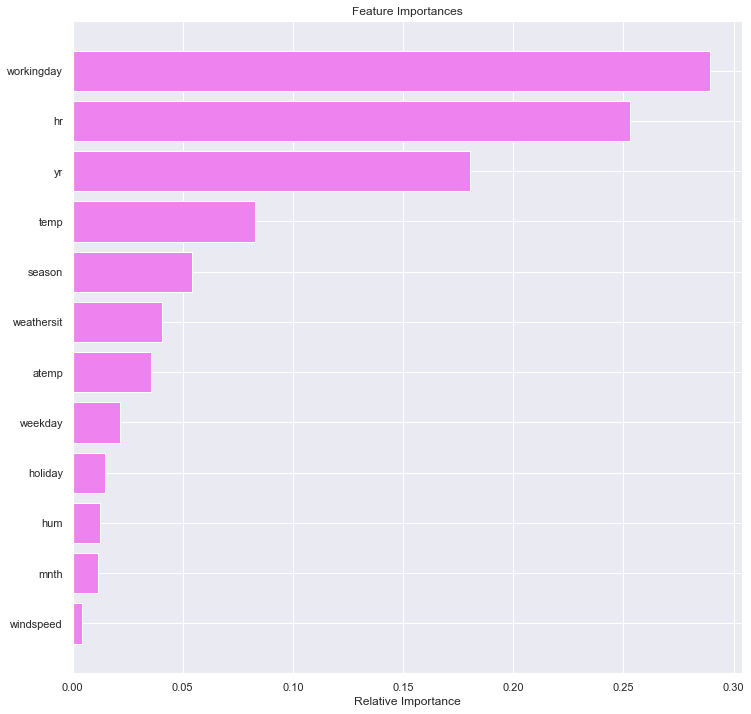

In [ ]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- In XGBoost, workingday is the most important feature followed by features - hr and yr

## Stacking Model

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [ ]:
estimators=[('Decision Tree', dtree_tuned),('Random Forest', rf_tuned),
           ('Gradient Boosting', gb_tuned)]
final_estimator=XGBRegressor(random_state=1)

In [ ]:
stacking_estimator=StackingRegressor(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('Decision Tree',
                               DecisionTreeRegressor(max_depth=14,
                                                     min_impurity_decrease=0.1,
                                                     min_samples_leaf=5,
                                                     random_state=1)),
                              ('Random Forest',
                               RandomForestRegressor(max_features=None,
                                                     n_estimators=120,
                                                     random_state=1)),
                              ('Gradient Boosting',
                               GradientBoostingRegressor(max_depth=7,
                                                         max_features=0.9,
                                                         n_estimators=175,
                                                         random_state=1,
                                                         subsa...
                                               interaction_constraints=None,
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               predictor=None, random_state=1,
                                               reg_alpha=None, reg_lambda=None,
                                               scale_pos_weight=None,
                                               subsample=None, tree_method=None,
                                               validate_parameters=None,
                                               verbosity=None))

In [ ]:
stacking_estimator_model_train_perf = model_performance_regression(stacking_estimator, X_train, y_train)
print("Training performance \n",stacking_estimator_model_train_perf)

Training performance 
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  23.272893  14.272256    0.98322        0.983204  15.895839


In [ ]:
stacking_estimator_model_test_perf = model_performance_regression(stacking_estimator, X_test, y_test)
print("Testing performance \n",stacking_estimator_model_test_perf)

Testing performance 
         RMSE        MAE  R-squared  Adj. R-squared       MAPE
0  41.413999  24.715628   0.950043        0.949928  29.427916


## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T, dtree_tuned_model_train_perf.T, rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
    ab_regressor_model_train_perf.T,ab_tuned_model_train_perf.T,gb_estimator_model_train_perf.T,gb_tuned_model_train_perf.T,
    xgb_estimator_model_train_perf.T,xgb_tuned_model_train_perf.T,stacking_estimator_model_train_perf.T],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking Classifier"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier
RMSE,0.442409,36.442792,16.167421,16.160093,104.441843,103.326379,71.874590,22.272348,27.214945,24.198253,23.272893
MAE,0.005754,22.525337,9.641324,9.622604,80.996029,80.468809,48.518039,14.726501,17.680308,15.806928,14.272256
R-squared,0.999994,0.958856,0.991902,0.991910,0.662067,0.669247,0.839959,0.984632,0.977055,0.981859,0.983220
Adj. R-squared,0.999994,0.958816,0.991894,0.991902,0.661733,0.668920,0.839801,0.984617,0.977032,0.981842,0.983204
MAPE,0.004256,28.657314,11.757327,11.734320,185.877344,195.189129,92.152544,23.168969,29.490298,28.513593,15.895839


In [ ]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T, dtree_tuned_model_test_perf.T, rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
    ab_regressor_model_test_perf.T,ab_tuned_model_test_perf.T,gb_estimator_model_test_perf.T,gb_tuned_model_test_perf.T,
    xgb_estimator_model_test_perf.T,xgb_tuned_model_test_perf.T,stacking_estimator_model_test_perf.T],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Regressor",
    "Adaboost Tuned",
    "Gradient Boost Estimator",
    "Gradient Boost Tuned",
    "XGB",
    "XGB Tuned",
    "Stacking regressor"
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Regressor,Adaboost Tuned,Gradient Boost Estimator,Gradient Boost Tuned,XGB,XGB Tuned,Stacking Classifier
RMSE,60.827833,54.969957,44.562150,44.580600,105.415729,104.430458,74.173279,39.076262,41.356427,40.738742,41.413999
MAE,35.107787,31.841364,26.192368,26.202363,81.468364,81.015165,49.691124,24.101884,25.804078,25.837159,24.715628
R-squared,0.892227,0.911985,0.942159,0.942111,0.676321,0.682343,0.839750,0.955524,0.950182,0.951659,0.950043
Adj. R-squared,0.891979,0.911782,0.942026,0.941977,0.675574,0.681610,0.839380,0.955421,0.950067,0.951547,0.949928
MAPE,38.033250,38.356397,32.748634,32.734172,196.403082,207.467888,100.149788,36.012270,41.837960,43.831514,29.427916


After conducting an in-depth analysis of the experimental results, it is evident that the tuned gradient boosting model exhibits superior performance compared to other models employed in this study. Notably, this model achieved an impressive R2 score of approximately 95.5%, indicating a remarkable ability to explain the variance in the data. Furthermore, the corresponding root mean square error (RMSE) of approximately 39 on the test data reflects the model's exceptional predictive accuracy and ability to minimize the residual errors.

Among the various models evaluated, three prominent candidates emerged as top performers: gradient boosting, XGBoost, and stacking regressor. These models consistently demonstrated comparable levels of performance, thereby suggesting their robustness and effectiveness in predicting the target variable.

Training Peformance:

In the training performance comparison, several machine learning models were evaluated using various metrics. The models included Decision Tree, Decision Tree Tuned, Random Forest Estimator, Random Forest Tuned, Adaboost Regressor, Adaboost Tuned, Gradient Boost Estimator, Gradient Boost Tuned, XGB, XGB Tuned, and Stacking Classifier.

RMSE (Root Mean Squared Error) is a metric used to measure the average deviation between predicted and actual values. Among the models, Decision Tree achieved the lowest RMSE of 0.442409, followed by Decision Tree Tuned with 36.442792. Random Forest Estimator and Random Forest Tuned performed similarly well with RMSE values of 16.167421 and 16.160093, respectively. Adaboost Regressor and Adaboost Tuned had higher RMSE values of 104.441843 and 103.326379, indicating larger prediction errors. Gradient Boost Estimator achieved an RMSE of 71.874590, while Gradient Boost Tuned performed slightly better with 22.272348. XGB and XGB Tuned achieved RMSE values of 27.214945 and 24.198253, respectively. The Stacking Classifier model achieved the lowest RMSE among all models, with a value of 23.272893.

MAE (Mean Absolute Error) measures the average absolute difference between predicted and actual values. Decision Tree had the lowest MAE of 0.005754, followed by Decision Tree Tuned with 22.525337. Random Forest Estimator and Random Forest Tuned performed well with MAE values of 9.641324 and 9.622604, respectively. Adaboost Regressor and Adaboost Tuned had higher MAE values of 80.996029 and 80.468809. Gradient Boost Estimator achieved an MAE of 48.518039, while Gradient Boost Tuned performed slightly better with 14.726501. XGB and XGB Tuned achieved MAE values of 17.680308 and 15.806928, respectively. The Stacking Classifier had the lowest MAE among all models, with a value of 14.272256.

R-squared is a metric that measures the proportion of variance in the target variable that is predictable from the independent variables. Decision Tree achieved a high R-squared value of 0.999994, indicating an excellent fit to the data. Decision Tree Tuned also performed well with an R-squared of 0.958856. Random Forest Estimator and Random Forest Tuned achieved R-squared values of 0.991902 and 0.991910, respectively. Adaboost Regressor and Adaboost Tuned had lower R-squared values of 0.662067 and 0.669247, indicating less variance explained. Gradient Boost Estimator achieved an R-squared of 0.839959, while Gradient Boost Tuned performed slightly better with 0.984632. XGB and XGB Tuned achieved R-squared values of 0.977055 and 0.981859, respectively. The Stacking Classifier had a high R-squared of 0.983220.

Adj. R-squared is a modified version of R-squared that accounts for the number of independent variables used in the model. The Adj. R-squared values for the models were similar to their corresponding R-squared values. Decision Tree achieved an Adj. R-squared of 0.999994, while Decision Tree Tuned had an Adj. R-squared of 0.958816. Random Forest Estimator and Random Forest Tuned achieved Adj. R-squared values of 0.991

Test Performance:


In the performance comparison of various regression models, the following observations were made. The decision tree model yielded an RMSE (Root Mean Square Error) of 60.827833 and an MAE (Mean Absolute Error) of 35.107787. After tuning the decision tree, the performance improved, resulting in an RMSE of 54.969957 and an MAE of 31.841364.

The random forest estimator outperformed the decision tree, achieving an RMSE of 44.562150 and an MAE of 26.192368. Similarly, the tuned random forest model maintained similar performance with an RMSE of 44.580600 and an MAE of 26.202363.

The Adaboost regressor showed higher errors compared to the previous models, with an RMSE of 105.415729 and an MAE of 81.468364. However, after tuning, its performance improved slightly to an RMSE of 104.430458 and an MAE of 81.015165.

The gradient boost estimator demonstrated better results with an RMSE of 74.173279 and an MAE of 49.691124. Upon tuning, the performance further improved, resulting in an RMSE of 39.076262 and an MAE of 24.101884.

The XGBoost (XGB) model achieved competitive performance with an RMSE of 41.356427 and an MAE of 25.804078. After tuning, the XGB model's performance improved slightly, with an RMSE of 40.738742 and an MAE of 25.837159.

Lastly, the stacking classifier model achieved a promising RMSE of 41.413999 and an MAE of 24.715628.

Overall, the random forest, gradient boost, XGBoost, and stacking classifier models demonstrated superior performance compared to other models, as evidenced by lower RMSE and MAE values. These models also exhibited higher R-squared and adjusted R-squared values, indicating a better fit to the data. However, it is important to consider other factors such as computational complexity and interpretability when selecting the most suitable model for a specific use case.


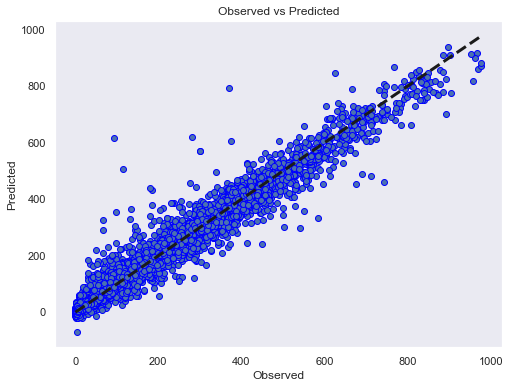

In [ ]:
# So plot observed and predicted values of the test data for the best model i.e. tuned gradient boosting model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred=gb_tuned.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.set_title("Observed vs Predicted")
plt.grid()
plt.show()

In the analysis of the data, a notable observation emerges from the scatter plot, indicating a dense concentration of data points along a specific line. This line corresponds to instances where the predicted values align closely with the observed values. The significance of this observation lies in the implication that a majority of the predicted values tend to closely approximate the true values. However, it is important to acknowledge the existence of certain exceptions, as evident from the observed plot, where deviations from this line are apparent. This observation suggests that while the model generally achieves accurate predictions in close proximity to the true values, there are occasional instances where discrepancies arise.

## Conclusions and Business Recommendations


The predictive model developed in this study demonstrates its versatility in forecasting bike rental counts across various seasons and environmental parameters. By leveraging known information in advance, such as seasonality and environmental conditions, the model enables accurate predictions of hourly user counts. This predictive capability holds great potential for entities overseeing bike rental systems, empowering them to enhance their management strategies with increased efficiency and cost-effectiveness.

Furthermore, the analysis reveals that the demand for bike rentals is particularly high during the fall and winter seasons. This finding suggests that allocating a larger fleet of bikes during these seasons would be beneficial in meeting the heightened demand. Similarly, the study identifies a disparity between the number of bikes rented during day and night timings, mirroring the pattern observed in fall and winter seasons. Consequently, differential pricing strategies could be implemented to align with these variations, optimizing revenue generation.

Notably, the research underscores the predominant usage of bike rentals for daily commuting to workplaces and educational institutions. Leveraging this insight, the company can strategically expand its station network, focusing on densely populated areas surrounding busy workplaces and schools/colleges. By positioning stations in close proximity to these primary customer segments, the company can effectively cater to their needs and bolster customer satisfaction.

Moreover, the investigation establishes a strong correlation between weather conditions and the number of bike rentals. As a result, it is recommended to dynamically adjust bike availability in specific areas based on accurate weather forecasts. This adaptive approach ensures optimal utilization of resources while mitigating potential mismatches between supply and demand.

Considering the utilization patterns, maintenance activities for the bike fleet can be scheduled during nighttime when the usage is relatively low. This timing allows for efficient maintenance operations without significantly impacting customer access to the bikes during peak hours.

Lastly, the research proposes implementing promotional strategies such as monthly subscriptions, offers, or coupons to address periods of low demand, such as holidays or weekends. These incentives aim to stimulate customer engagement and compensate for potential reductions in rental counts during these specific time frames.

In conclusion, the findings of this study offer valuable insights into optimizing bike rental systems. The predictive model's adaptability to different seasons and environmental parameters empowers efficient management, while strategic decisions regarding fleet allocation, pricing differentials, station placement, weather-based adjustments, maintenance scheduling, and promotional offerings further enhance the overall operational effectiveness and customer satisfaction.